In [10]:
!pip install geopy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [11]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn imbalanced-learn lightgbm category_encoders scikit-optimize missingno joblib psutil Boruta tqdm optuna

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [13]:
a = pd.read_csv("fraudTest.csv")
b = pd.read_csv("fraudTrain.csv")
data=pd.concat([a, b])

In [14]:
data.to_csv('CF.csv', index=False)

In [15]:

df = pd.read_csv("CF.csv")

In [16]:
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [17]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
print("\nDataset Information:")
(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 

In [19]:
print("\nStatistics:")
print(df.describe())


Statistics:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.8

In [20]:
df.drop(columns=["Unnamed: 0",'unix_time'],axis=1, inplace=True)
df.drop(columns=['cc_num'],axis=1, inplace=True)
df.drop(columns=['trans_num'],axis=1, inplace=True)

In [21]:
# Convert date columns to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [22]:
df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0


In [23]:
# Feature Engineering
# Calculate the age of the cardholder
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['dob'].dt.year

In [24]:
df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,56
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,34
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,54
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,37
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,69


In [25]:
# Calculate distance between user and merchant
def calculate_distance(row):
    user_coords = (row['lat'],row['long'])
    merchant_coords = (row['merch_lat'], row['merch_long'])
    return geodesic(user_coords, merchant_coords).miles
df['distance_user_merchant'] = df.apply(calculate_distance, axis=1)

In [27]:
df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,distance_user_merchant
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,56,15.294273
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,34,65.140855
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,54,36.788154
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,37,17.159238
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,69,64.885553


In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
#scaling is done for normalization

In [30]:
scaler = StandardScaler()
numerical_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'distance_user_merchant']#only numerical and continous variable are scaled, to avoid noise in data,Categorical Variables,Datetime Column,Target Variablew were not scaled 
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Number of Non-Fraud Transactions: 1842743
Number of Fraud Transactions: 9651


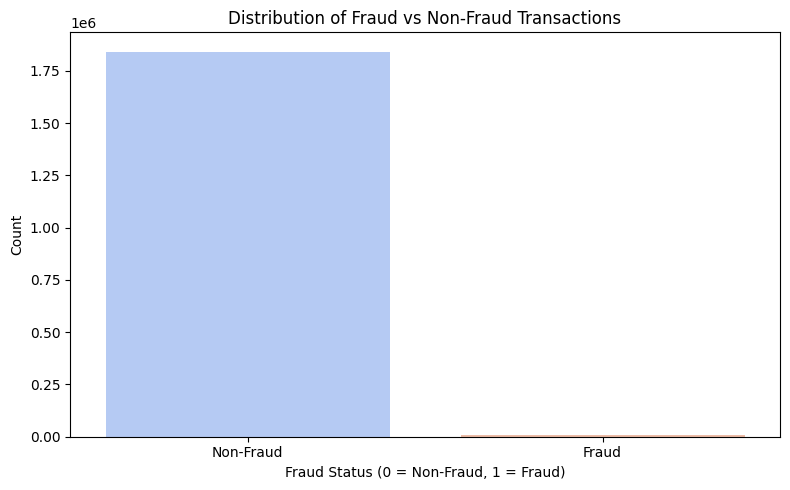

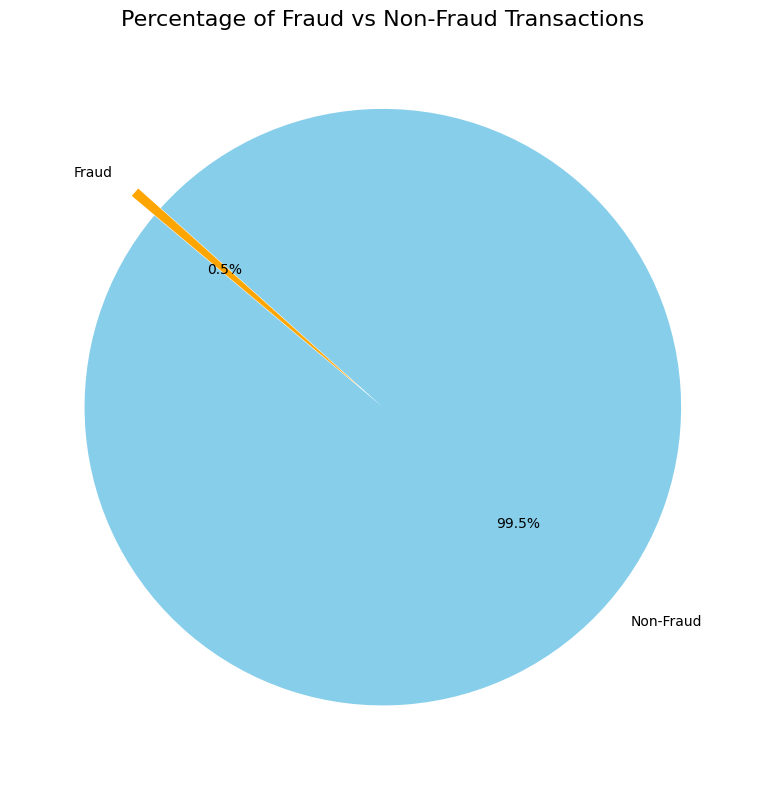

In [31]:
# Calculate the number of fraud and non-fraud transactions
fraud_count = df['is_fraud'].value_counts()

# Printing the counts
print(f"Number of Non-Fraud Transactions: {fraud_count[0]}")
print(f"Number of Fraud Transactions: {fraud_count[1]}")

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['is_fraud'], palette='coolwarm')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

fraud_percentage = fraud_count / fraud_count.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(
    fraud_percentage,
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'orange'],
    explode=(0, 0.1)  # Slightly explode the "Fraud" slice for emphasis
)
plt.title('Percentage of Fraud vs Non-Fraud Transactions', fontsize=16)
plt.tight_layout()
plt.show()


In [32]:
#graphs and plots

In [33]:
#do the descriptive analysis of fraud distribution,then for each category we do the graphs,do hypotheiss testing and then +Feature importance as well+correlation matrix.

/tmp/ipykernel_2183187/3493683015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_name()


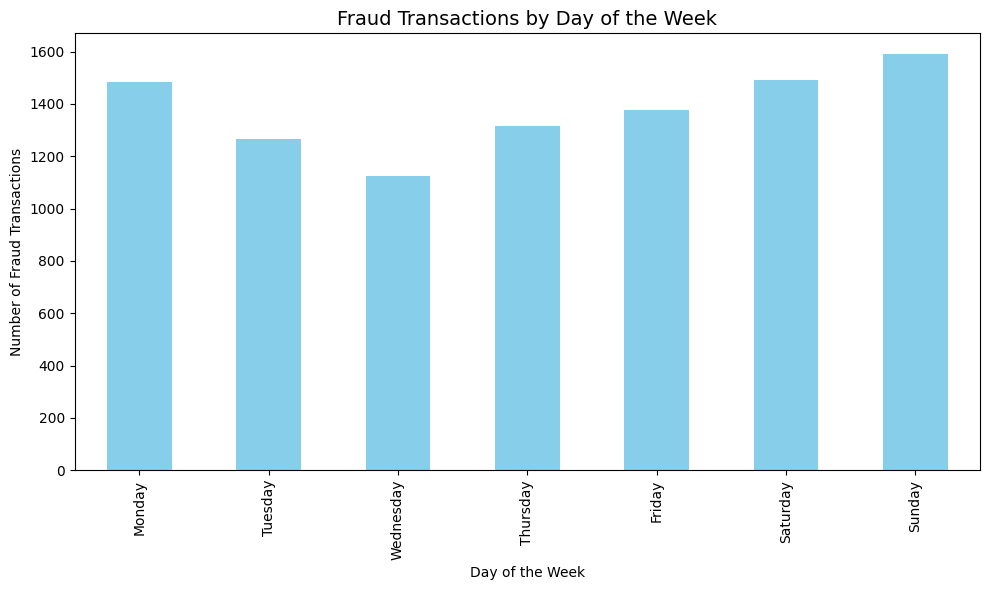

/tmp/ipykernel_2183187/3493683015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['month'] = fraud_transactions['trans_date_trans_time'].dt.month_name()


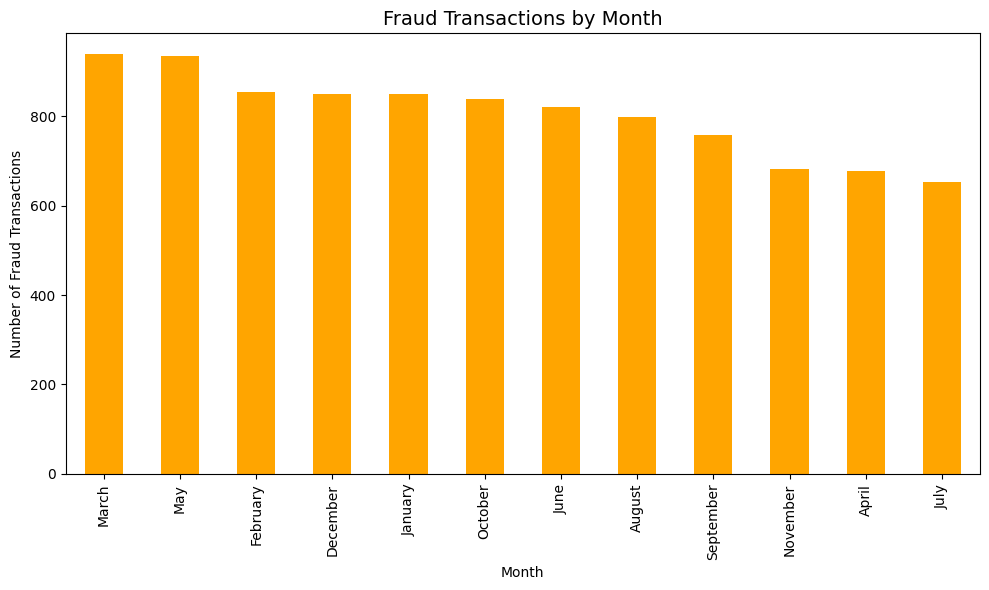

/tmp/ipykernel_2183187/3493683015.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour


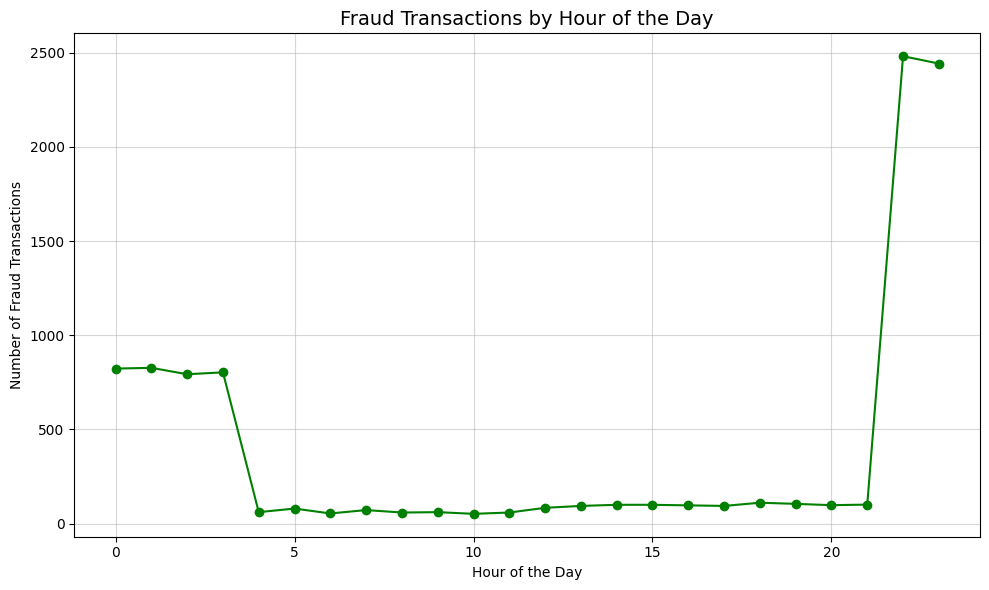

Fraud Transactions Analysis:

Fraud by Day of the Week:
Monday       1484
Tuesday      1266
Wednesday    1125
Thursday     1317
Friday       1376
Saturday     1493
Sunday       1590
Name: day_of_week, dtype: int64

Fraud by Month:
March        938
May          935
February     853
December     850
January      849
October      838
June         821
August       797
September    758
November     682
April        678
July         652
Name: month, dtype: int64

Fraud by Hour of the Day:
0      823
1      827
2      793
3      803
4       61
5       80
6       54
7       72
8       59
9       61
10      52
11      59
12      84
13      94
14     100
15     100
16      97
17      94
18     111
19     105
20      98
21     101
22    2481
23    2442
Name: hour, dtype: int64


In [34]:

fraud_transactions = df[df['is_fraud'] == 1]

# 1. Aggregating fraud transactions by day of the week
fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_name()
fraud_by_day = fraud_transactions['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting fraud by day of the week
plt.figure(figsize=(10, 6))
fraud_by_day.plot(kind='bar', color='skyblue')
plt.title('Fraud Transactions by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()

# 2. Aggregate fraud transactions by month
fraud_transactions['month'] = fraud_transactions['trans_date_trans_time'].dt.month_name()
fraud_by_month = fraud_transactions['month'].value_counts()

# Plotting fraud by month
plt.figure(figsize=(10, 6))
fraud_by_month.plot(kind='bar', color='orange')
plt.title('Fraud Transactions by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()

# 3. Aggregate fraud transactions by hour
fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour
fraud_by_hour = fraud_transactions['hour'].value_counts().sort_index()

# Plotting fraud by hour of the day
plt.figure(figsize=(10, 6))
fraud_by_hour.plot(kind='line', color='green', marker='o')
plt.title('Fraud Transactions by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

print("Fraud Transactions Analysis:")
print("\nFraud by Day of the Week:")
print(fraud_by_day)
print("\nFraud by Month:")
print(fraud_by_month)
print("\nFraud by Hour of the Day:")
print(fraud_by_hour)

Fraud by Day of the Week
Observations:
Sundays experience the highest number of fraudulent transactions (1590), followed by Saturdays (1493) and Mondays (1484). This suggests that fraudulent activity peaks during weekends, with Sunday seeing the most significant spike. The weekday fraud volumes are consistently high but tend to dip slightly mid-week, with Wednesday showing the lowest (1125).
Explanation:
Fraud activity during weekends could be due to reduced monitoring or less customer activity, giving fraudsters an opportunity to exploit low oversight periods.
Actionable Insight:
Strengthen financial monitoring systems during weekends, especially on Sundays and Mondays, when fraud is most prevalent.

Fraud by Month
Observations:
The highest fraud rates are observed in March (938), May (935), and February (853), while July (652) and April (678) have the lowest. The fraud rates during March and May indicate a seasonal trend, possibly linked to specific transactional behaviors or industry patterns.
Explanation:
Increased fraud in these months could be related to factors such as increased consumer spending, tax-related activities, or more online shopping. The lower fraud rates in summer months (June–July) might reflect reduced economic activity or better security measures in place during these periods.
Actionable Insight:
Focus fraud detection efforts around March, May, and February, which show higher fraud activity, while monitoring the summer months for reduced fraud vulnerabilities.

Fraud by Hour of the Day
Observations:
Fraud peaks during late-night hours, particularly between 10 PM and midnight, with a sharp spike at 11 PM (2442 transactions). The fraud rate during the early hours (12 AM–3 AM) also remains high. Conversely, fraud significantly decreases during the morning hours (4 AM–4 PM), coinciding with active monitoring times.
Explanation:
Late-night fraud may be the result of fraudsters taking advantage of reduced oversight during these off-hours. This could include coordinated fraud campaigns or the exploitation of lower transaction volumes.
Actionable Insight:
Implement enhanced fraud detection systems for transactions between 10 PM and 3 AM, when fraud rates are highest.

Overall Conclusions
Fraudulent activity is concentrated during specific times and periods:

Peak periods: Late-night hours (especially between 10 PM and midnight), weekends (particularly Sundays), and months like March and May.
Fraud patterns: Fraudsters tend to target periods of reduced vigilance—weekends, late-night hours, and summer months—capitalizing on these low-risk times.
Recommendations:
Time-sensitive Monitoring: Strengthen real-time fraud detection for late-night transactions (10 PM–3 AM).
Day-specific Measures: Increase vigilance on weekends, particularly Sundays, and Mondays.
Seasonal Focus: Allocate additional resources during higher-risk months, especially March, May, and February, while ensuring monitoring during the summer months.

In [35]:
from scipy.stats import chi2_contingency

# Fraud by Day of the Week
expected_by_day = [fraud_by_day.mean()] * len(fraud_by_day)
chi2_stat_day, p_val_day, _, _ = chi2_contingency([fraud_by_day.values, expected_by_day])

# Fraud by Hour of the Day
expected_by_hour = [fraud_by_hour.mean()] * len(fraud_by_hour)
chi2_stat_hour, p_val_hour, _, _ = chi2_contingency([fraud_by_hour.values, expected_by_hour])

# Fraud by Month
expected_by_month = [fraud_by_month.mean()] * len(fraud_by_month)
chi2_stat_month, p_val_month, _, _ = chi2_contingency([fraud_by_month.values, expected_by_month])


print("Hypothesis Testing Results:")
print(f"Fraud by Day of the Week: Chi2 Stat = {chi2_stat_day}, P-value = {p_val_day}")
print(f"Fraud by Hour of the Day: Chi2 Stat = {chi2_stat_hour}, P-value = {p_val_hour}")
print(f"Fraud by Month: Chi2 Stat = {chi2_stat_month}, P-value = {p_val_month}")


Hypothesis Testing Results:
Fraud by Day of the Week: Chi2 Stat = 55.38727283775192, P-value = 3.871460872516969e-10
Fraud by Hour of the Day: Chi2 Stat = 7353.987038975108, P-value = 0.0
Fraud by Month: Chi2 Stat = 63.002407958362255, P-value = 2.554411319762846e-09


Fraud by Day of the Week
Chi2 Stat: 55.39
P-value: 3.87e-10
Interpretation:
The Chi-Square test indicates a statistically significant relationship between fraud and the day of the week. The extremely low p-value (well below the common significance level of 0.05) suggests that the day of the week significantly influences the occurrence of fraud.
Conclusion:
Fraudulent activity is not evenly distributed across the days of the week, supporting the earlier observation that certain days (like Sundays and Mondays) see higher fraud levels.

Fraud by Hour of the Day
Chi2 Stat: 7353.99
P-value: 0.0
Interpretation:
The Chi-Square statistic is exceptionally high, and the p-value is 0, which indicates a highly significant relationship between fraud and the time of day. This result confirms that fraud is heavily concentrated during specific hours, especially in the late-night and early morning periods.
Conclusion:
The findings support the hypothesis that late-night hours (10 PM to 3 AM) experience a significantly higher volume of fraudulent transactions, aligning with the observed spikes during these times.

Fraud by Month
Chi2 Stat: 63.00
P-value: 2.55e-09
Interpretation:
The Chi-Square statistic indicates a strong association between fraud and the month of occurrence, with a very low p-value (much less than 0.05), indicating a statistically significant variation in fraud across different months.
Conclusion:
Fraud is not evenly distributed across months, and the higher fraud rates in months like March and May are statistically significant. This result backs the observation that certain months, such as March and May, show increased fraud activity.

Overall Implications
The day of the week, hour of the day, and month all exhibit statistically significant relationships with fraud occurrence.
These findings validate the need for targeted fraud prevention strategies during peak days (Sundays and Mondays), late-night hours (10 PM–3 AM), and specific months (March and May).

Descriptive Statistics for Transaction Amount (amt) by Fraud Status:
              count      mean       std       min       25%       50%  \
is_fraud                                                                
0         1842743.0 -0.015147  0.964172 -0.433669 -0.379605 -0.143316   
1            9651.0  2.892223  2.455380 -0.433293  1.067549  2.008970   

               75%         max  
is_fraud                        
0         0.078469  181.338295  
1         5.226254    8.200591  


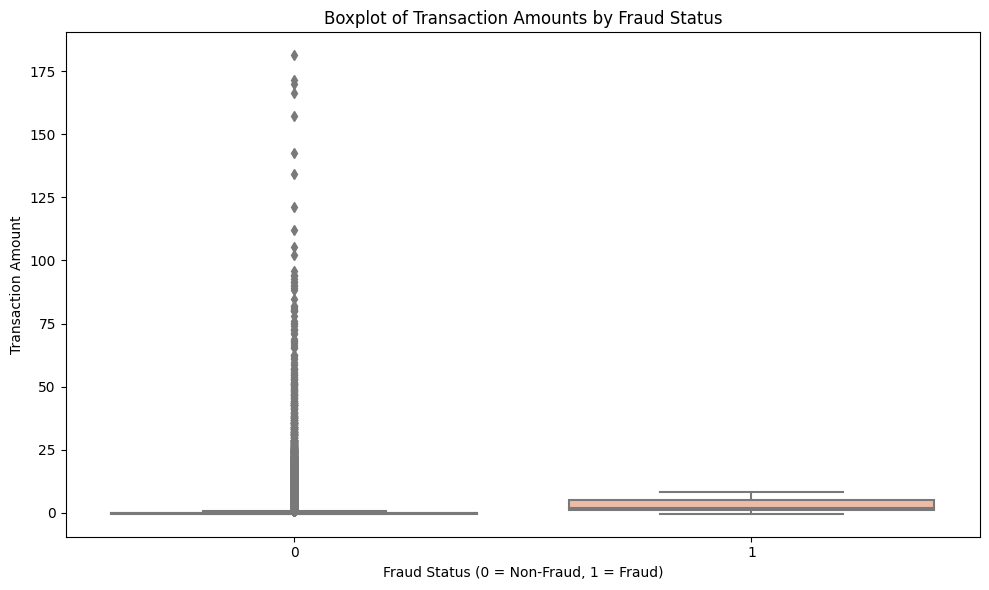

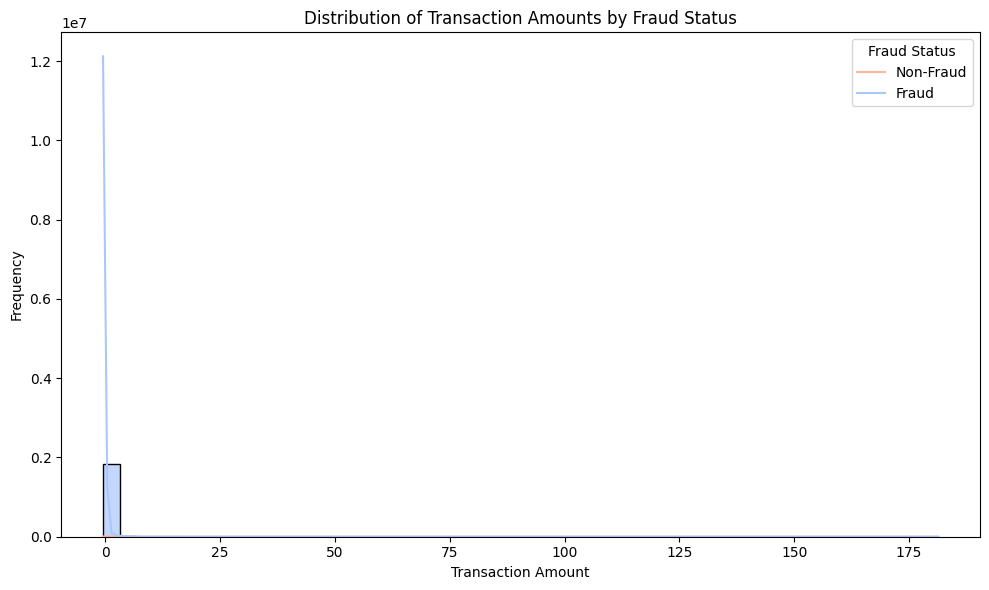

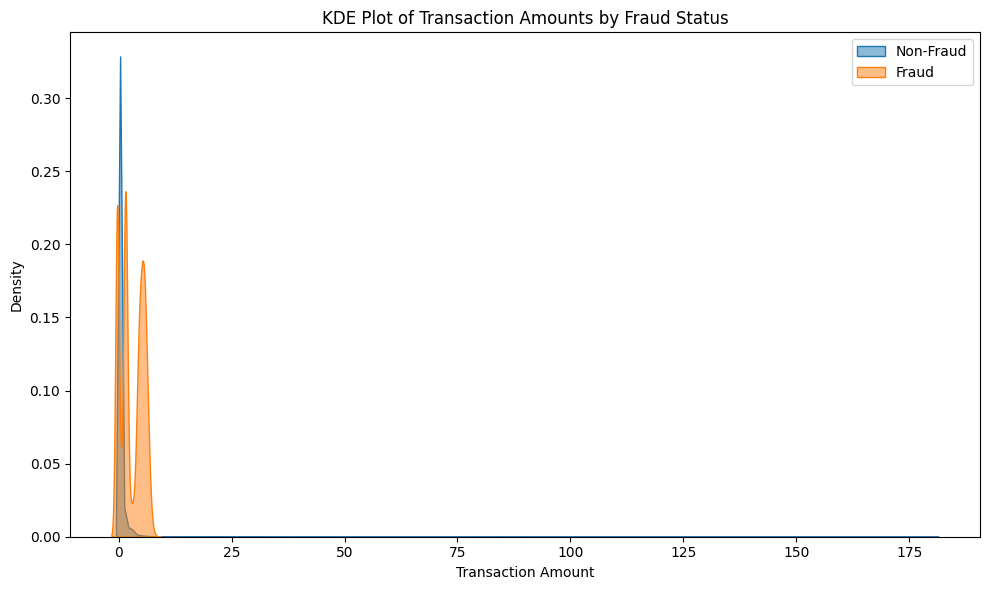

In [36]:
#amount analysis


# Amount by fraud status
fraud_stats = df.groupby('is_fraud')['amt'].describe()

print("Descriptive Statistics for Transaction Amount (amt) by Fraud Status:")
print(fraud_stats)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df, palette='coolwarm')
plt.title('Boxplot of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

# Histogram to visualize distribution of amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True, palette='coolwarm', alpha=0.7)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# KDE Plot for detailed density comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['is_fraud'] == 0], x='amt', fill=True, label='Non-Fraud', alpha=0.5)
sns.kdeplot(data=df[df['is_fraud'] == 1], x='amt', fill=True, label='Fraud', alpha=0.5)
plt.title('KDE Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Non-Fraudulent Transactions (is_fraud = 0): 1,842,743 transactions.
Fraudulent Transactions (is_fraud = 1): 9,651 transactions.
Insight: Fraudulent transactions are a tiny fraction of the total dataset, highlighting a significant class imbalance.

Fraudulent transactions tend to involve mid-to-high transaction amounts, with a mean of 2.89 (normalized), compared to non-fraudulent transactions, which cluster around smaller amounts with a mean of -0.015. This suggests that fraudsters often target mid-sized transactions, potentially to avoid detection associated with extremely high-value transactions. The variability in fraudulent transaction amounts (standard deviation: 2.455) indicates that while many fraudulent transactions involve moderate sums, there are also attempts at smaller and occasionally higher amounts. In contrast, non-fraudulent transactions show a broader range, with outliers on the high end, though the majority cluster around small or near-zero amounts.

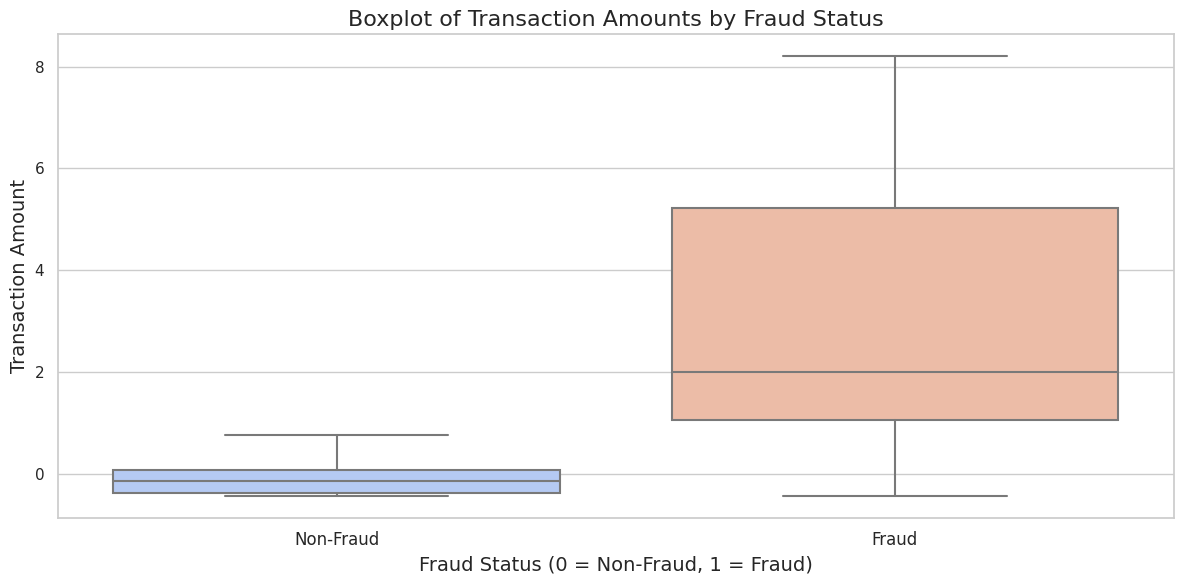

In [37]:
# Set plot style
sns.set(style="whitegrid")

# Create a pretty boxplot for transaction amounts by fraud status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=df, palette='coolwarm', showfliers=False)
plt.title('Boxplot of Transaction Amounts by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import ttest_ind

# Separate transaction amounts by fraud status
fraud_amt = df[df['is_fraud'] == 1]['amt']
nonfraud_amt = df[df['is_fraud'] == 0]['amt']

# t-test
t_stat, p_val = ttest_ind(fraud_amt, nonfraud_amt, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: 116.2766573924367
P-Value: 0.0


Non-Fraudulent Transactions (0):
    
There are numerous outliers with extremely high transaction amounts.
Most non-fraudulent transactions cluster near the lower range of amounts.
This might suggest The extreme outliers in non-fraudulent transactions may represent legitimate high-value transactions,
such as bulk purchases.
need to be handled before modeling(I'll do log tranformation for normalization)
Fraudulent Transactions (1):

The distribution of fraudulent transactions is relatively compact compared to non-fraudulent transactions.
Fraudulent transactions tend to involve higher median amounts compared to non-fraudulent ones, but they lack the extreme outliers
present in non-fraudulent data.
Fraudulent transactions are generally within a narrower range of amounts. This reflects a possible behavioral trend where 
fraudsters target mid-to-high-value transactions that are less likely to trigger automatic alerts.

THE OUTLIERS ARE not removed in our case because its important as it is statistcally significant and also would be used for predictive modelling


In [39]:
# Apply log transformation to the 'amt' column
df['log_amt'] = np.log1p(df['amt'])  # log1p handles values close to zero safely


# 'log_amt' grouped by fraud status
log_amt_stats = df.groupby('is_fraud')['log_amt'].describe()
print(log_amt_stats)

              count      mean       std       min       25%       50%  \
is_fraud                                                                
0         1842743.0 -0.121662  0.393873 -0.568577 -0.477399 -0.154686   
1            9651.0  1.049345  0.891126 -0.567912  0.726364  1.101598   

               75%       max  
is_fraud                      
0         0.075542  5.205864  
1         1.828775  2.219268  


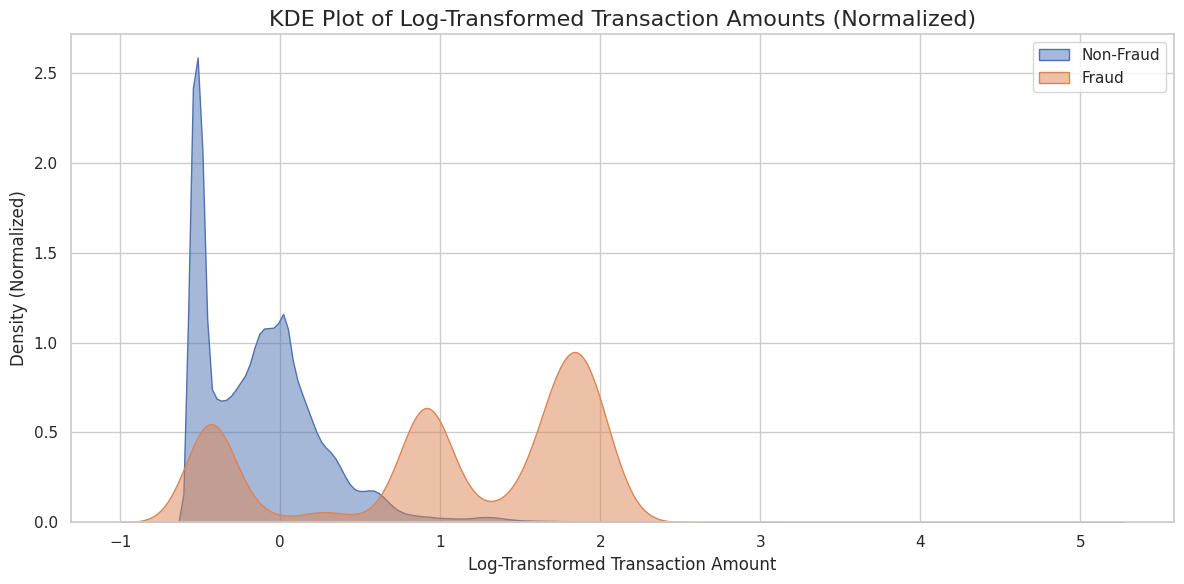

In [40]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['is_fraud'] == 0], x='log_amt', fill=True, label='Non-Fraud', alpha=0.5)
sns.kdeplot(data=df[df['is_fraud'] == 1], x='log_amt', fill=True, label='Fraud', alpha=0.5)
plt.title('KDE Plot of Log-Transformed Transaction Amounts (Normalized)', fontsize=16)
plt.xlabel('Log-Transformed Transaction Amount')
plt.ylabel('Density (Normalized)')
plt.legend()
plt.tight_layout()
plt.show()

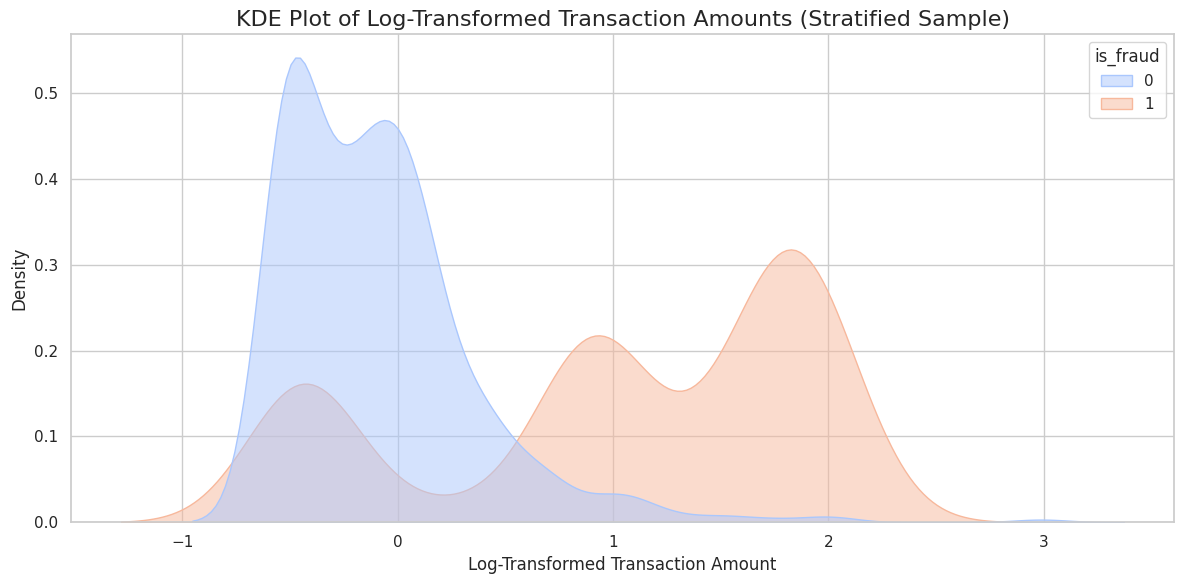

In [41]:
fraud_sample = df[df['is_fraud'] == 1].sample(500, random_state=42)
nonfraud_sample = df[df['is_fraud'] == 0].sample(500, random_state=42)
sampled_data = pd.concat([fraud_sample, nonfraud_sample])

plt.figure(figsize=(12, 6))
sns.kdeplot(data=sampled_data, x='log_amt', hue='is_fraud', fill=True, alpha=0.5, palette='coolwarm')
plt.title('KDE Plot of Log-Transformed Transaction Amounts (Stratified Sample)', fontsize=16)
plt.xlabel('Log-Transformed Transaction Amount')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Descriptive Statistics for Log-Transformed Amount (log_amt):

Non-Fraudulent Transactions (is_fraud = 0):

Count: 1,842,743 transactions.
Mean: -0.1217, indicating most non-fraudulent transactions are concentrated near small log-transformed amounts.
Standard Deviation: 0.3939, showing lower variability compared to fraudulent transactions.
Median: -0.1547, confirming the majority of non-fraudulent transactions have small values.
Range: Min is -0.5686, Max is 5.2059, indicating rare high-value non-fraudulent transactions.
Fraudulent Transactions (is_fraud = 1):

Count: 9,651 transactions.
Mean: 1.0493, indicating fraudulent transactions typically involve larger amounts.
Standard Deviation: 0.8911, reflecting greater variability in fraudulent amounts.
Median: 1.1016, suggesting that the central tendency for fraudulent transactions lies within mid-to-high amounts.
Range: Min is -0.5679, Max is 2.2193, showing that fraudulent transactions are less likely to involve extremely high amounts.
KDE Plots Analysis:

The density peaks for non-fraudulent transactions are concentrated around small transaction amounts (log-transformed values close to -0.1).
Fraudulent transactions exhibit a clear peak in the mid-range (log-transformed values between 0.7 and 1.8), indicating a tendency for fraud to target mid-to-high transaction amounts.
Non-fraudulent transactions display a wider range of values with a gradual density decline, while fraudulent transactions have a sharper decline beyond their peak.
Stratified KDE Plot Insights:

When comparing a stratified sample, fraudulent transactions clearly shift toward higher log-transformed amounts relative to non-fraudulent ones.
The overlap at lower log-transformed amounts suggests that smaller fraudulent transactions exist but are less common compared to higher-value fraudulent transactions.
Key Observations:
Fraudulent Transactions: Tend to cluster around mid-to-high log-transformed transaction amounts (peaking around log values of 1.0–1.8).
Non-Fraudulent Transactions: Dominated by smaller amounts with a wide range, but extreme values (high log-transformed amounts) are rare.
The log transformation reduces skewness in the raw transaction amounts, making the patterns between fraud and non-fraud clearer.

          category  total_transactions  fraud_transactions  fraud_rate
11    shopping_net              139322                2219    0.015927
8         misc_net               90654                1182    0.013039
4      grocery_pos              176191                2228    0.012645
12    shopping_pos              166463                1056    0.006344
2    gas_transport              188029                 772    0.004106
9         misc_pos              114229                 322    0.002819
3      grocery_net               64878                 175    0.002697
13          travel               57956                 156    0.002692
10   personal_care              130085                 290    0.002229
0    entertainment              134118                 292    0.002177
7        kids_pets              161727                 304    0.001880
1      food_dining              130729                 205    0.001568
6             home              175460                 265    0.001510
5   he

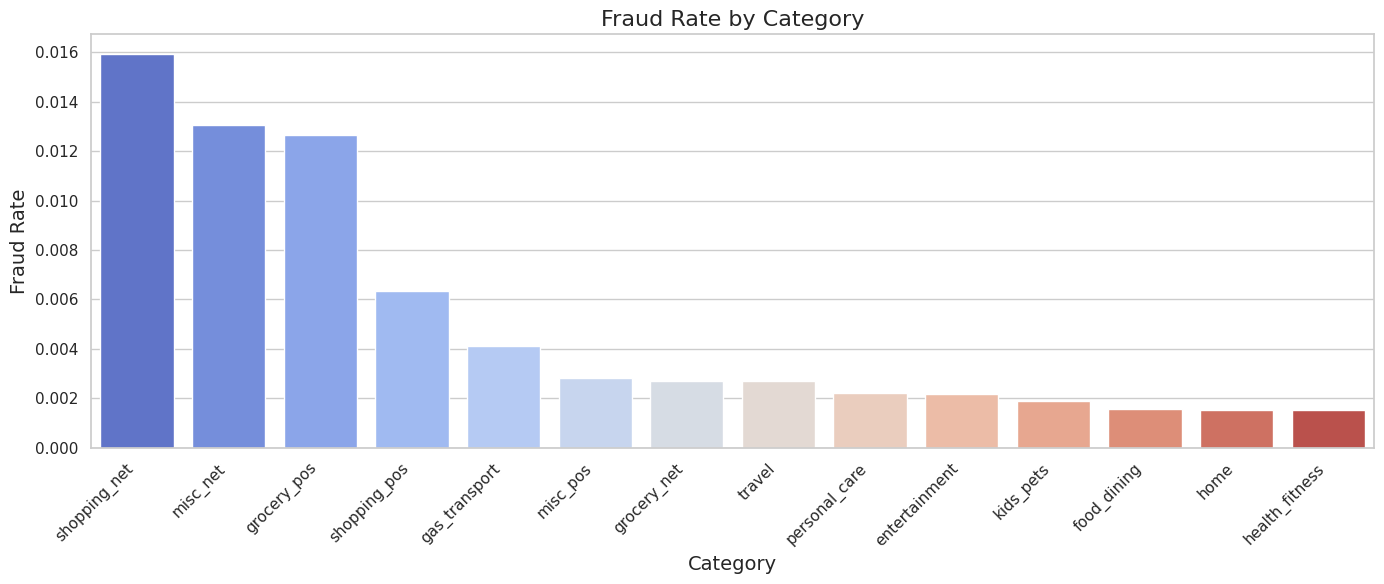

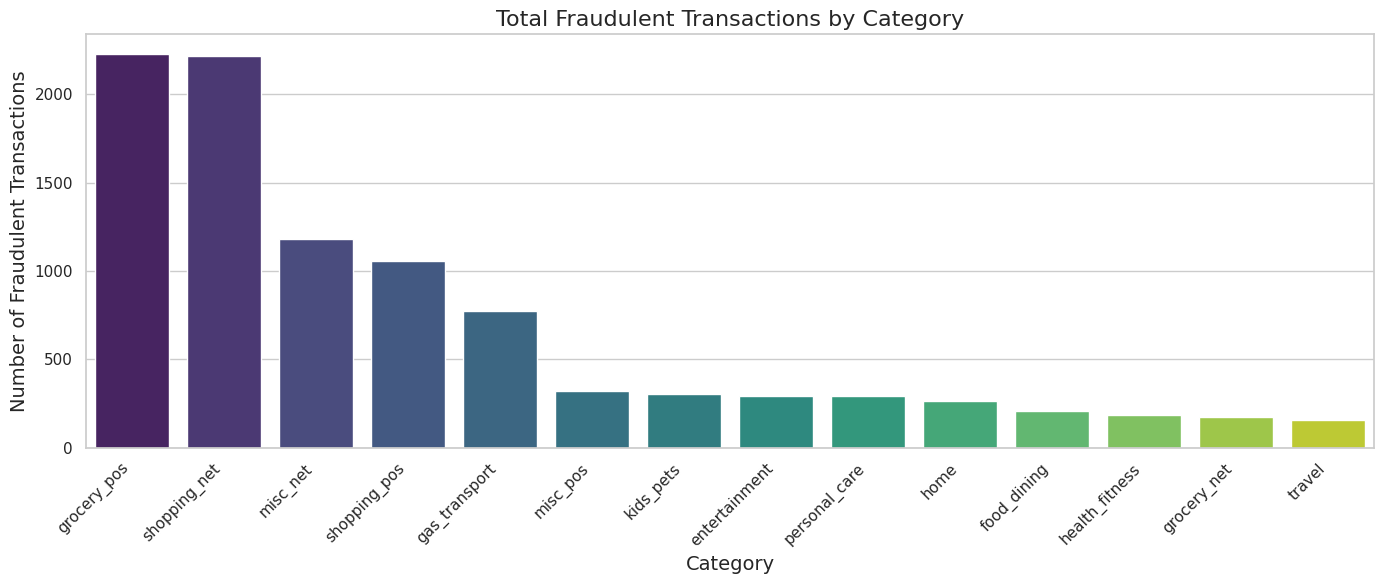

In [42]:
#CATEGORY 
# 1. Group by `category` and calculate fraud stats
category_fraud_stats = df.groupby('category')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
category_fraud_stats.columns = ['category', 'total_transactions', 'fraud_transactions', 'fraud_rate']


print(category_fraud_stats.sort_values(by='fraud_rate', ascending=False))

# 2. Visualization: Fraud Rate by Category
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_fraud_stats.sort_values(by='fraud_rate', ascending=False),
    x='category',
    y='fraud_rate',
    palette='coolwarm'
)
plt.title('Fraud Rate by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualization: Total Fraudulent Transactions by Category
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_fraud_stats.sort_values(by='fraud_transactions', ascending=False),
    x='category',
    y='fraud_transactions',
    palette='viridis'
)
plt.title('Total Fraudulent Transactions by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fraud Rate by Category
Top Categories with High Fraud Rates:
Shopping_net (Category 11): The highest fraud rate at 1.59%.
Misc_net (Category 8): Fraud rate of 1.30%.
Grocery_pos (Category 4): Fraud rate of 1.26%.
These categories exhibit significantly higher fraud rates compared to others, suggesting they may involve higher-risk transactions. Potential contributing factors include high-value items, frequent online transactions, or vulnerabilities in fraud detection mechanisms specific to these transaction types.

Total Fraudulent Transactions by Category
Categories with the Most Fraudulent Transactions:
Grocery_pos (Category 4): 2,228 fraudulent transactions.
Shopping_net (Category 11): 2,219 fraudulent transactions.
Misc_net (Category 8): 1,182 fraudulent transactions.
These categories not only have high fraud rates but also a large volume of total fraudulent transactions. Their high transaction volumes likely contribute to the higher absolute fraud counts. Fraud detection systems should focus monitoring efforts on these categories to mitigate risks.

Fraud Rates vs. Transaction Volume
Categories like Shopping_net (11), Misc_net (8), Grocery_pos (4), Shopping_pos (12), and Gas_transport (2) stand out as combining high fraud rates and high transaction volumes, making them critical areas for fraud prevention efforts.
Conversely, categories such as Health_fitness (5) and Home (6) have low fraud rates and fewer fraudulent transactions, suggesting they are lower-risk categories.

Actionable Insights:
Focus on High-Risk Categories: Prioritize tighter fraud detection in high-risk categories such as Shopping_net, Misc_net, and Grocery_pos.

Volume-Driven Risk Management: While fraud rates are important, categories with high transaction volumes (e.g., Grocery_pos and Shopping_net) should be monitored due to their absolute contribution to fraud.

Evaluate Fraud Detection Systems: Investigate whether the higher fraud rates in certain categories result from weaker detection systems, transaction characteristics (e.g., online payments), or customer behavior.

Null Hypothesis (H₀): There is no association between the category and the likelihood of fraud (is_fraud).
Alternative Hypothesis (H₁): There is an association between the category and the likelihood of fraud.


In [43]:

contingency_table = pd.crosstab(df['category'], df['is_fraud'])

# Chi-Square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)


print("Chi2 Statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)


expected_frequencies = pd.DataFrame(expected, 
                                     index=contingency_table.index, 
                                     columns=contingency_table.columns)
print("\nExpected Frequencies:")
print(expected_frequencies)

Chi2 Statistic: 8329.139945520074
P-Value: 0.0
Degrees of Freedom: 13

Expected Frequencies:
is_fraud                    0           1
category                                 
entertainment   133419.243246  698.756754
food_dining     130047.899986  681.100014
gas_transport   187049.366143  979.633857
grocery_net      64539.984665  338.015335
grocery_pos     175273.042297  917.957703
health_fitness  121914.497066  638.502934
home            174545.850818  914.149182
kids_pets       160884.399950  842.600050
misc_net         90181.691326  472.308674
misc_pos        113633.865229  595.134771
personal_care   129407.255236  677.744764
shopping_net    138596.130330  725.869670
shopping_pos    165595.725320  867.274680
travel           57654.048387  301.951613


there is a statistically significant association between category and fraud (is_fraud).
Chi2 Statistic:A high Chi2 statistic indicates a strong deviation between observed and expected frequencies, confirming that the likelihood of fraud depends on the transaction category.


In [44]:
from scipy.stats import chi2_contingency


contingency_table_merchants = pd.crosstab(df['merchant'], df['is_fraud'])

chi2_stat_merchant, p_val_merchant, dof_merchant, expected_merchant = chi2_contingency(contingency_table_merchants)


print("Chi2 Statistic:", chi2_stat_merchant)
print("P-Value:", p_val_merchant)
print("Degrees of Freedom:", dof_merchant)



Chi2 Statistic: 8761.093873779395
P-Value: 0.0
Degrees of Freedom: 692


Chi2 Statistic: 8761.09
A very high Chi-Square statistic indicates a strong relationship between the merchant and the occurrence of fraud. It suggests that fraud is not evenly distributed across merchants, with certain merchants being significantly more likely to experience fraudulent transactions.
P-Value: 0.0
The p-value being effectively zero confirms that the relationship between merchant and fraud is statistically significant at any reasonable significance level (e.g., 0.05 or 0.01). This means there is almost no chance that this relationship occurred due to random variation in the data.

Certain merchants are disproportionately affected by fraudulent transactions, which could be due to various factors, such as:
Merchant-specific transaction characteristics (e.g., high-value items, frequent online purchases).
Vulnerabilities in specific merchants' fraud detection systems.
Fraudsters targeting specific merchants due to weaker security protocols or higher success rates.
Merchants with higher fraud rates should be identified and flagged for additional monitoring and analysis, as they could represent a focal point for fraud prevention efforts.
Actionable Recommendations:
Merchant-Level Risk Profiling:


Tailored Fraud Detection:
Develop merchant-specific fraud detection rules or thresholds for high-risk merchants. Focus on anomalies in transaction patterns or customer behavior for these merchants.

Further Investigation:
Conduct a deeper analysis of high-risk merchants to understand the underlying causes of fraud. This could include analyzing transaction amounts, times, and customer profiles associated with these merchants.
Collaborative Efforts:
Work with high-risk merchants to improve fraud prevention systems, such as implementing enhanced verification or monitoring mechanisms.
By acting on these insights, fraud prevention efforts can be made more effective and targeted, minimizing losses and reducing risks associated with specific merchants.

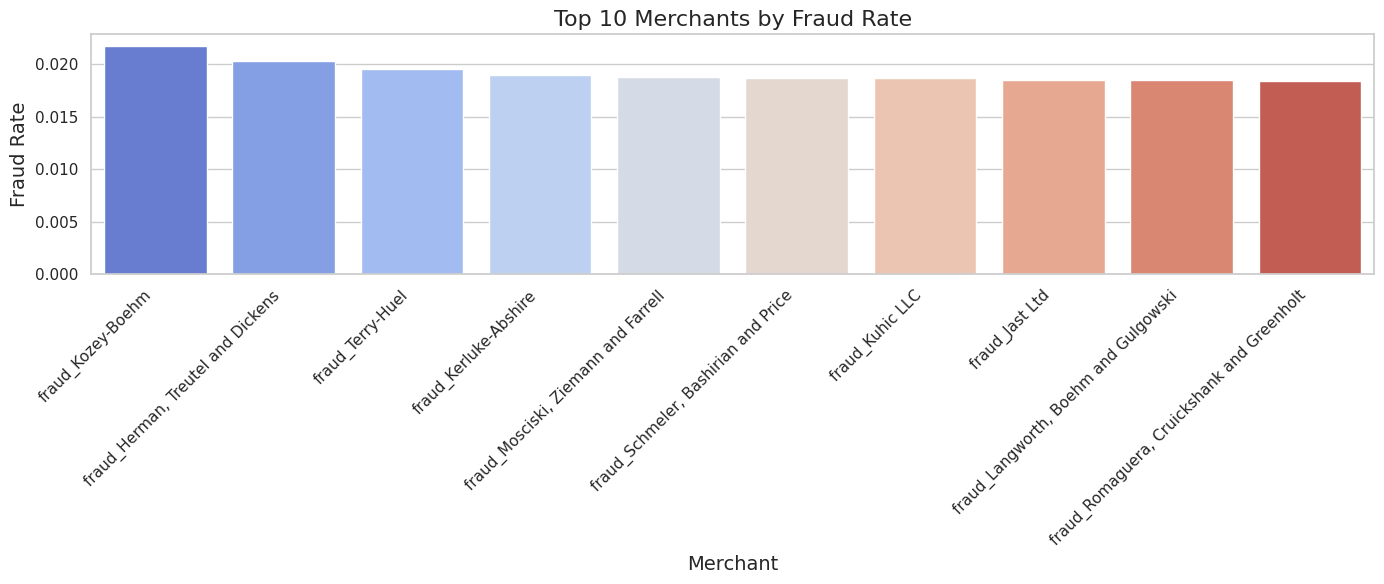

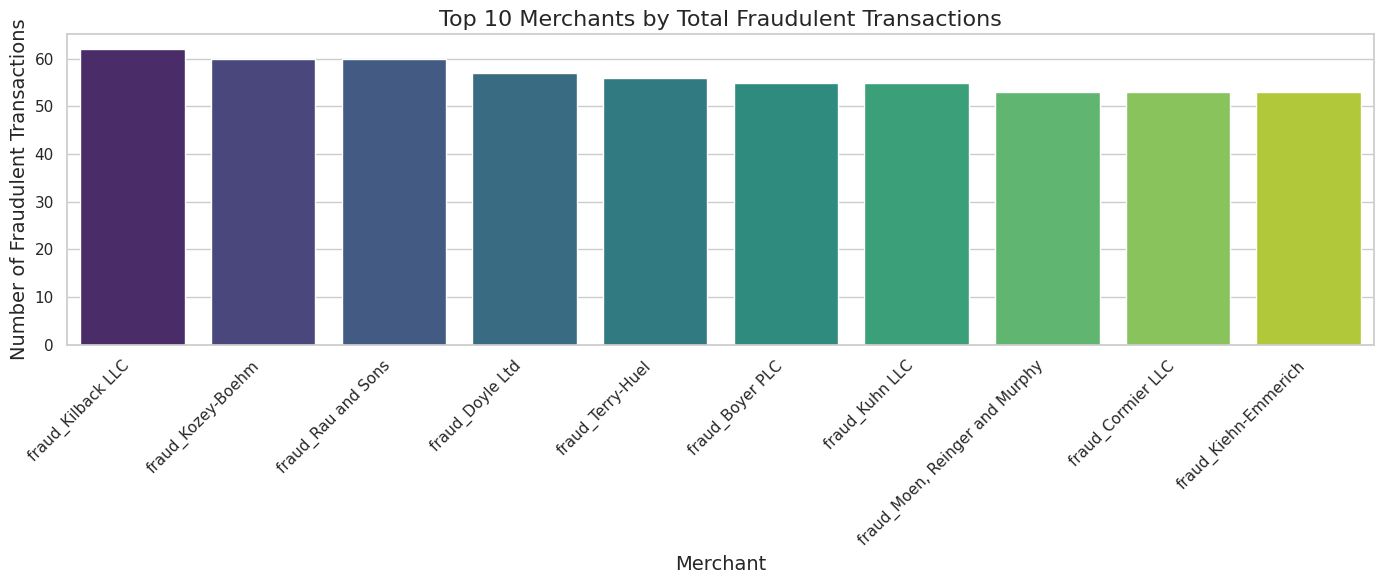

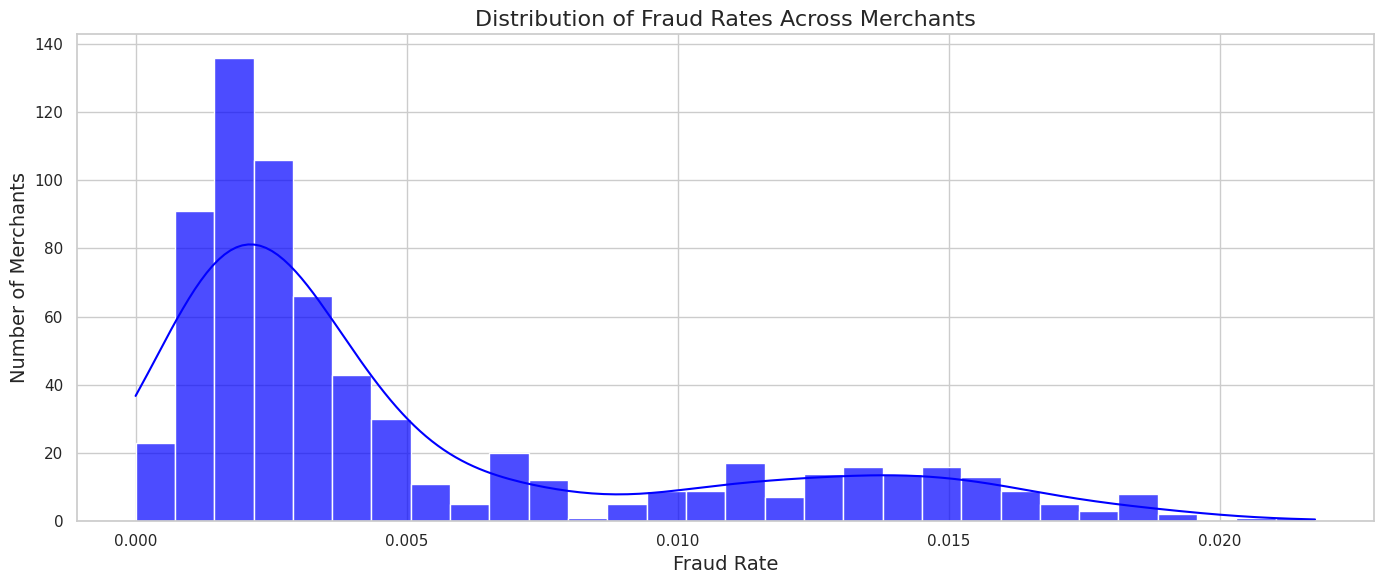

In [45]:

contingency_table_merchants = pd.crosstab(df['merchant'], df['is_fraud'])

# Calculate fraud rate per merchant
merchant_fraud_stats = contingency_table_merchants.copy()
merchant_fraud_stats['total_transactions'] = merchant_fraud_stats.sum(axis=1)
merchant_fraud_stats['fraud_rate'] = merchant_fraud_stats[1] / merchant_fraud_stats['total_transactions']

# Top merchants by fraud rate
top_merchants_by_fraud_rate = merchant_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(10)

# Top merchants by total fraudulent transactions
top_merchants_by_fraud_transactions = merchant_fraud_stats.sort_values(by=1, ascending=False).head(10)

#  Top merchants by fraud rate
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_merchants_by_fraud_rate.reset_index(),
    x='merchant',
    y='fraud_rate',
    palette='coolwarm'
)
plt.title('Top 10 Merchants by Fraud Rate', fontsize=16)
plt.xlabel('Merchant', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top merchants by total fraudulent transactions
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_merchants_by_fraud_transactions.reset_index(),
    x='merchant',
    y=1,
    palette='viridis'
)
plt.title('Top 10 Merchants by Total Fraudulent Transactions', fontsize=16)
plt.xlabel('Merchant', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fraud rate distribution across all merchants
plt.figure(figsize=(14, 6))
sns.histplot(merchant_fraud_stats['fraud_rate'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Fraud Rates Across Merchants', fontsize=16)
plt.xlabel('Fraud Rate', fontsize=14)
plt.ylabel('Number of Merchants', fontsize=14)
plt.tight_layout()
plt.show()

Majority of Merchants Have Low Fraud Rates:

Most merchants have fraud rates clustered close to 0.0 or below 0.005, indicating that fraud is rare for the majority of merchants.The distribution suggests that fraud is concentrated among a small subset of merchants.

Long Tail for Higher Fraud Rates:
A small number of merchants exhibit higher fraud rates, extending up to 0.02 or higher. These merchants likely account for a disproportionate share of fraudulent activity.

Bimodal Trend:
The KDE curve shows a slight peak around 0.01, suggesting that a subset of merchants consistently experiences higher fraud rates.
Insights:
Merchant-Level Risk Profiling: Merchants with fraud rates in the upper range (e.g., >0.01) should be flagged for further investigation and enhanced fraud detection mechanisms.

Risk Mitigation: The majority of merchants (fraud rates near 0.0) may require less intensive monitoring, allowing resources to be allocated toward higher-risk merchants.

Targeted Fraud Prevention: Investigate the specific characteristics of high-risk merchants (e.g., transaction patterns, customer demographics) to understand why they are more susceptible to fraud.

Recommendations:
Segmentation:

Group merchants into low-, medium-, and high-risk categories based on their fraud rates for targeted monitoring.
Tailored Solutions:

Implement stricter fraud detection thresholds or additional security measures for merchants in the higher fraud rate range.
Collaborative Investigation:

Partner with high-risk merchants to review transaction practices and implement customized fraud prevention strategies.


Fraud Statistics by Gender:
  gender  total_transactions  fraud_transactions  fraud_rate
0      F             1014749                4899    0.004828
1      M              837645                4752    0.005673

Chi-Square Test Results for Gender and Fraud:
Chi2 Statistic: 63.09104141423143
P-Value: 1.97369744724312e-15
Degrees of Freedom: 1


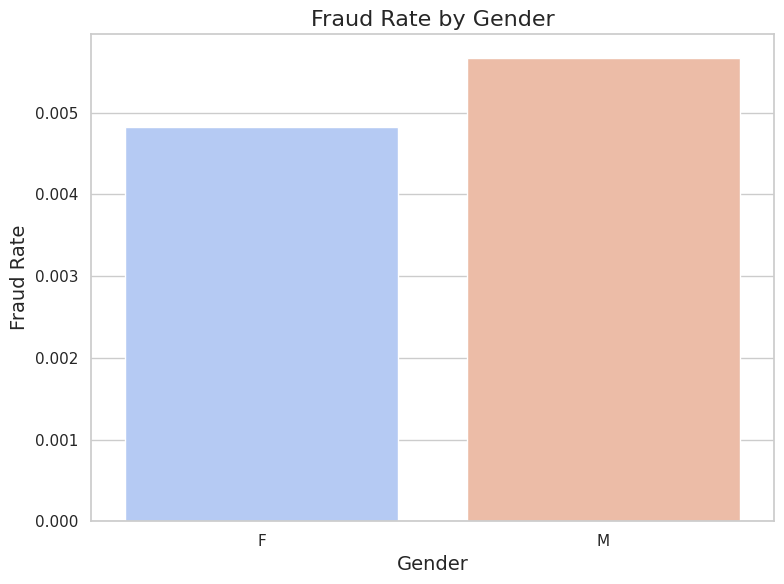

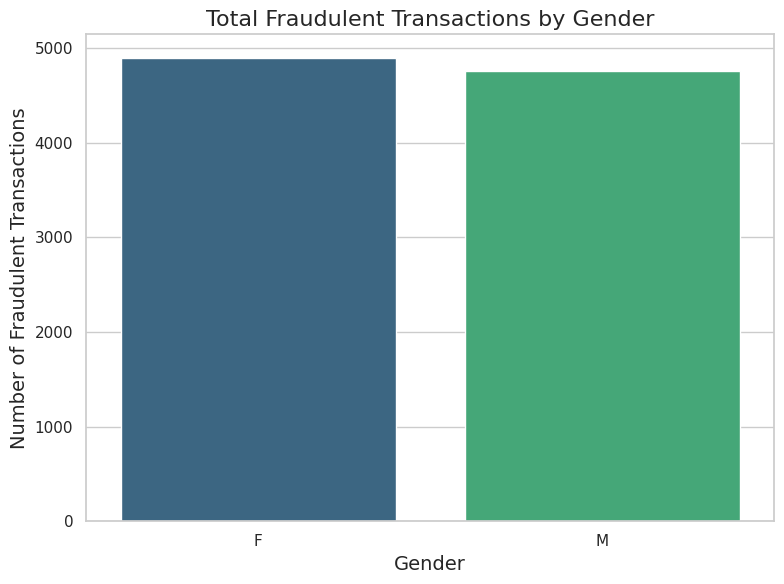

In [46]:
# Group by gender and calculate fraud stats
gender_fraud_stats = df.groupby('gender')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
gender_fraud_stats.columns = ['gender', 'total_transactions', 'fraud_transactions', 'fraud_rate']


print("Fraud Statistics by Gender:")
print(gender_fraud_stats)

# Chi-Square Test for gender and fraud
contingency_table_gender = pd.crosstab(df['gender'], df['is_fraud'])
chi2_stat_gender, p_val_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)

print("\nChi-Square Test Results for Gender and Fraud:")
print(f"Chi2 Statistic: {chi2_stat_gender}")
print(f"P-Value: {p_val_gender}")
print(f"Degrees of Freedom: {dof_gender}")

# Fraud Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_fraud_stats, x='gender', y='fraud_rate', palette='coolwarm')
plt.title('Fraud Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.tight_layout()
plt.show()

# Fraudulent Transactions by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_fraud_stats, x='gender', y='fraud_transactions', palette='viridis')
plt.title('Total Fraudulent Transactions by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.tight_layout()
plt.show()

Fraud Rates by Gender:Gender 1 :male and 0 is female

Gender 1 (fraud rate: 0.5673%) has a slightly higher fraud rate than Gender 0 (fraud rate: 0.4828%).
While the difference in fraud rates is small, it is statistically significant as evidenced by the Chi-Square test.
Chi-Square Test Results:

Chi2 Statistic: 63.09
Indicates a strong association between gender and fraud occurrence.
P-Value: 1.97e-15
The extremely low p-value confirms that the relationship between gender and fraud is statistically significant at any standard confidence level (e.g., 95%).
Degrees of Freedom: 1
With binary gender categories, this value is expected.
Insights:
Higher Fraud Rate in Gender 1:

Fraud detection systems might need to account for this slight disparity and analyze why Gender 1 experiences higher fraud rates.
Potential factors could include behavioral differences in spending patterns, transaction types, or vulnerability to certain types of fraud schemes.
Low Overall Fraud Rates:

Both genders have low fraud rates (<1%), meaning that fraud remains rare in the overall dataset, but the statistical significance suggests this variable could still be relevant for predictive modeling.
Recommendations:
Gender-Based Segmentation:

Monitor fraud rates across genders to identify and address behavioral or transactional patterns that may contribute to the disparity.
Investigate Transaction Types:

Perform additional analysis to see if Gender 1 is more susceptible to fraud in certain categories (e.g., shopping, online transactions).
Incorporate Gender in Models:

Include gender as a feature in predictive fraud detection models, as it has been shown to have a statistically significant relationship with fraud occurrence.
By leveraging these insights, fraud prevention strategies can be refined to address subtle differences in fraud risks across gender groups, leading to more effective monitoring and intervention.

Fraud Statistics by City:
              city  total_transactions  fraud_transactions  fraud_rate
306      Greenport                  10                  10         1.0
617    Orange Park                  10                  10         1.0
275       Freeport                   9                   9         1.0
279         Gaines                   8                   8         1.0
57          Beacon                  11                  11         1.0
294       Granbury                  12                  12         1.0
781    Springville                  12                  12         1.0
109       Buellton                   8                   8         1.0
855         Waukau                  10                  10         1.0
313        Grenola                   9                   9         1.0
656  Pleasant Hill                   8                   8         1.0
315        Grifton                  10                  10         1.0
318        Guthrie                   9             

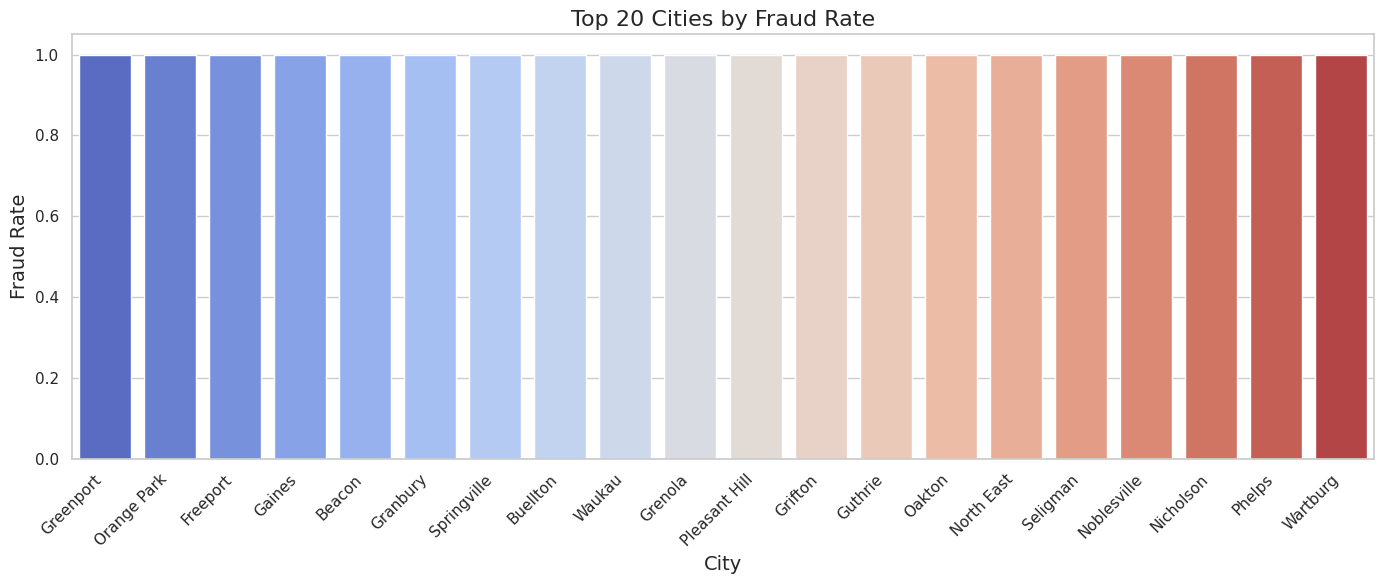

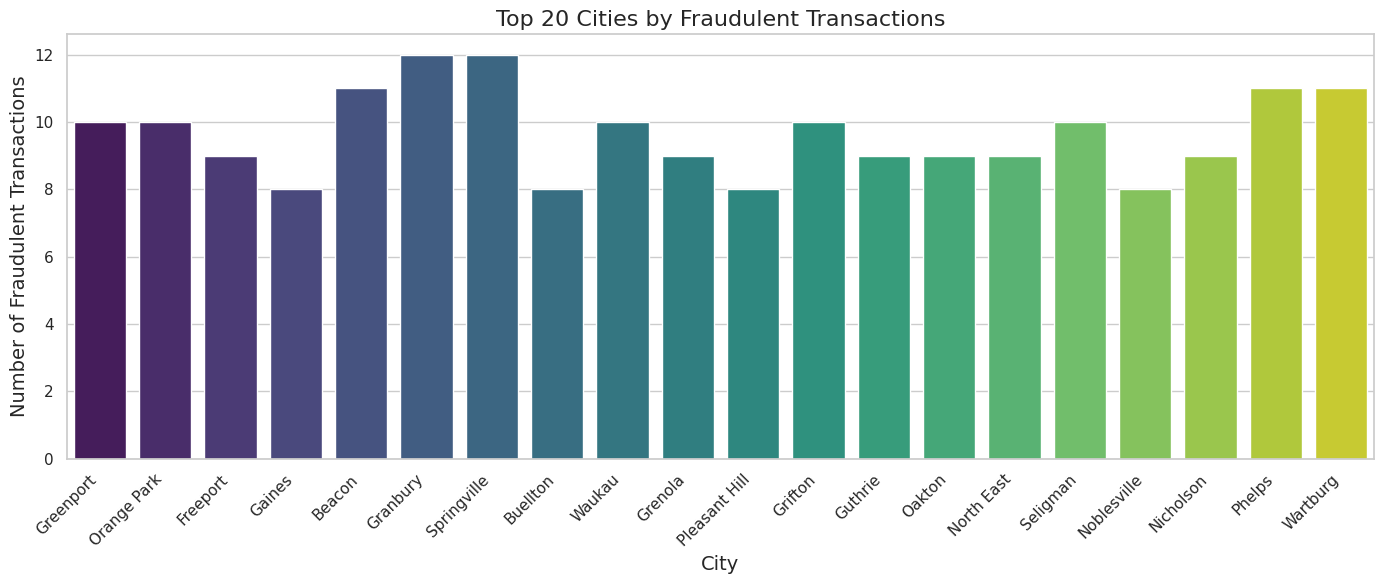

In [47]:

# Group by `city` and calculate fraud stats
city_fraud_stats = df.groupby('city')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
city_fraud_stats.columns = ['city', 'total_transactions', 'fraud_transactions', 'fraud_rate']


print("Fraud Statistics by City:")
print(city_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(20))

# Chi-Square Test for `city` and `is_fraud`
contingency_table_city = pd.crosstab(df['city'], df['is_fraud'])
chi2_stat_city, p_val_city, dof_city, expected_city = chi2_contingency(contingency_table_city)

print("\nChi-Square Test Results for City and Fraud:")
print(f"Chi2 Statistic: {chi2_stat_city}")
print(f"P-Value: {p_val_city}")
print(f"Degrees of Freedom: {dof_city}")

# Fraud Rate by City (Top 20 Cities)
top_20_cities = city_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(20)
plt.figure(figsize=(14, 6))
sns.barplot(data=top_20_cities, x='city', y='fraud_rate', palette='coolwarm')
plt.title('Top 20 Cities by Fraud Rate', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fraudulent Transactions by City (Top 20 Cities)
plt.figure(figsize=(14, 6))
sns.barplot(data=top_20_cities, x='city', y='fraud_transactions', palette='viridis')
plt.title('Top 20 Cities by Fraudulent Transactions', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cities such as Senatobia, Kirtland, and Rice show fraud rates of 100%. However, these cities have very low transaction counts (e.g., 10 transactions total), which skews the fraud rate.
Cities with more transactions (e.g., Jay, Chatham, and Elk Rapids) show more realistic fraud rates (around 6%).
So below,"city fraud risk" is created based on normalized fraud rates weighted by transaction volume.

In [48]:
# To Create a "city fraud risk" feature based on normalized fraud rates weighted by transaction volume

#  Normalize fraud rates to a 0-1 scale
city_fraud_stats['normalized_fraud_rate'] = (
    (city_fraud_stats['fraud_rate'] - city_fraud_stats['fraud_rate'].min()) /
    (city_fraud_stats['fraud_rate'].max() - city_fraud_stats['fraud_rate'].min())
)

# Weight normalized fraud rates by transaction volume
city_fraud_stats['city_fraud_risk'] = (
    city_fraud_stats['normalized_fraud_rate'] * city_fraud_stats['total_transactions']
)

# Merge the `city_fraud_risk` feature back into the main dataset
df = df.merge(
    city_fraud_stats[['city', 'city_fraud_risk']],
    on='city',
    how='left'
)




              city  total_transactions  fraud_transactions  fraud_rate  \
194         Dallas                5141                  39    0.007586   
362        Houston                5865                  39    0.006650   
74      Birmingham                8040                  36    0.004478   
571  New York City                3680                  35    0.009511   
11       Allentown                5119                  34    0.006642   
118         Camden                3678                  34    0.009244   
848         Warren                6584                  33    0.005012   
213        Detroit                5124                  33    0.006440   
850     Washington                5130                  31    0.006043   
26         Arcadia                5850                  30    0.005128   
371     Huntsville                5103                  29    0.005683   
561         Naples                5849                  29    0.004958   
821          Tulsa                4400

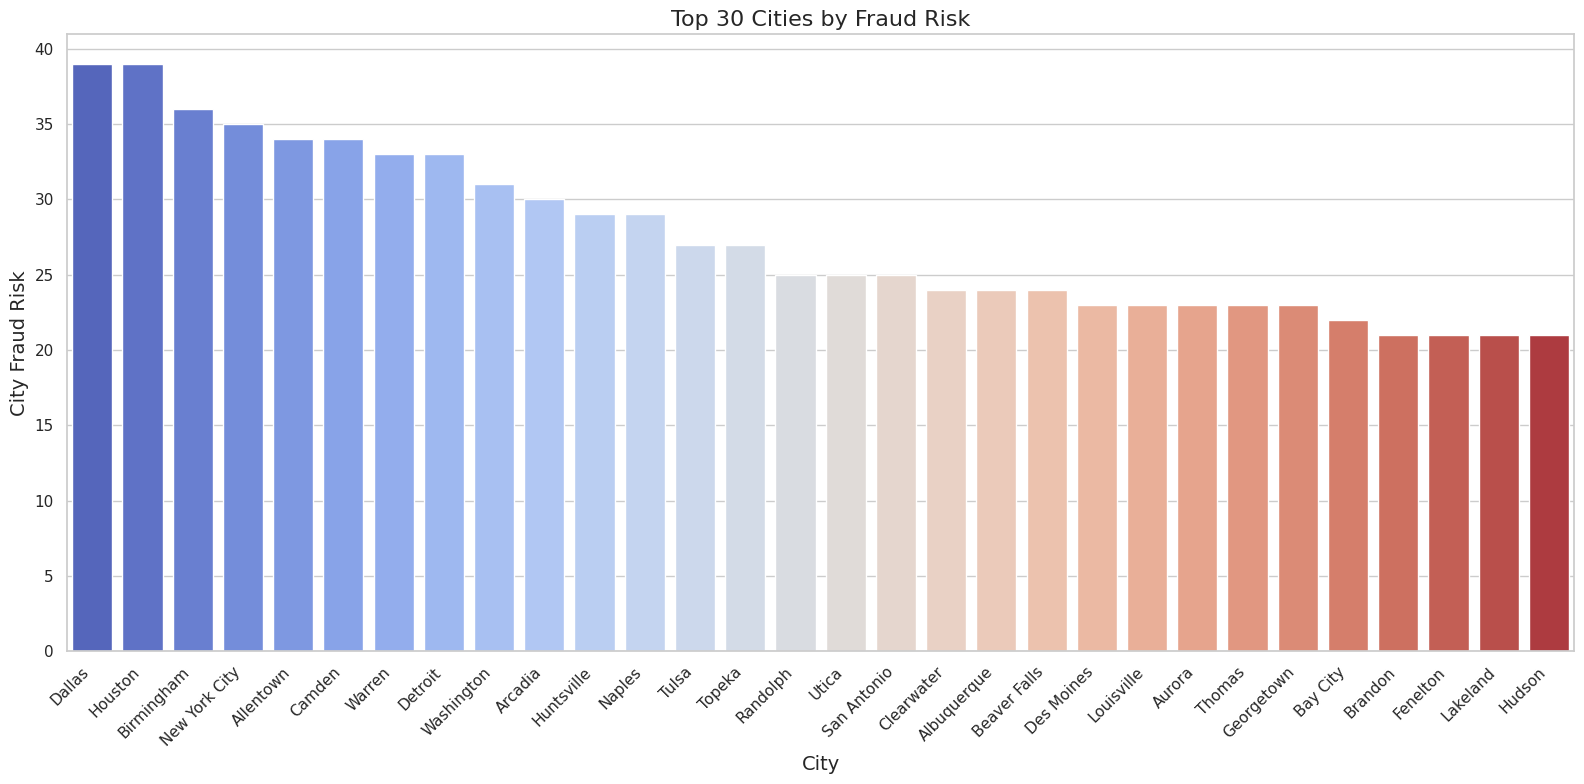

In [49]:
# Sort city fraud stats by 'city_fraud_risk' 
top_30_city_fraud_risk = city_fraud_stats.sort_values(by='city_fraud_risk', ascending=False).head(30)

print(top_30_city_fraud_risk)





plt.figure(figsize=(16, 8))
sns.barplot(
    data=top_30_city_fraud_risk,
    x='city',
    y='city_fraud_risk',
    palette='coolwarm'
)
plt.title('Top 30 Cities by Fraud Risk', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('City Fraud Risk', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
# Separate city fraud risk values for fraud and non-fraud transactions
fraud_risk_fraud = df[df['is_fraud'] == 1]['city_fraud_risk']
fraud_risk_non_fraud = df[df['is_fraud'] == 0]['city_fraud_risk']

# Perform a t-test
t_stat, p_val = ttest_ind(fraud_risk_fraud, fraud_risk_non_fraud, equal_var=False)


print("T-Test Results for City Fraud Risk and Fraud:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Test Results for City Fraud Risk and Fraud:
T-Statistic: 19.59634770481979
P-Value: 6.723383468460419e-84


Fraud Statistics by State:
   state  total_transactions  fraud_transactions  fraud_rate
8     DE                   9                   9    1.000000
39    RI                 745                  15    0.020134
0     AK                2963                  50    0.016875
37    OR               26408                 197    0.007460
30    NH               11727                  79    0.006737
45    VA               41756                 273    0.006538
42    TN               24913                 159    0.006382
29    NE               34425                 216    0.006275
23    MN               45433                 280    0.006163
34    NY              119419                 730    0.006113
7     DC                5130                  31    0.006043
16    KS               32939                 193    0.005859
33    NV                8058                  47    0.005833
5     CO               19766                 115    0.005818
21    ME               23433                 134    0.0057

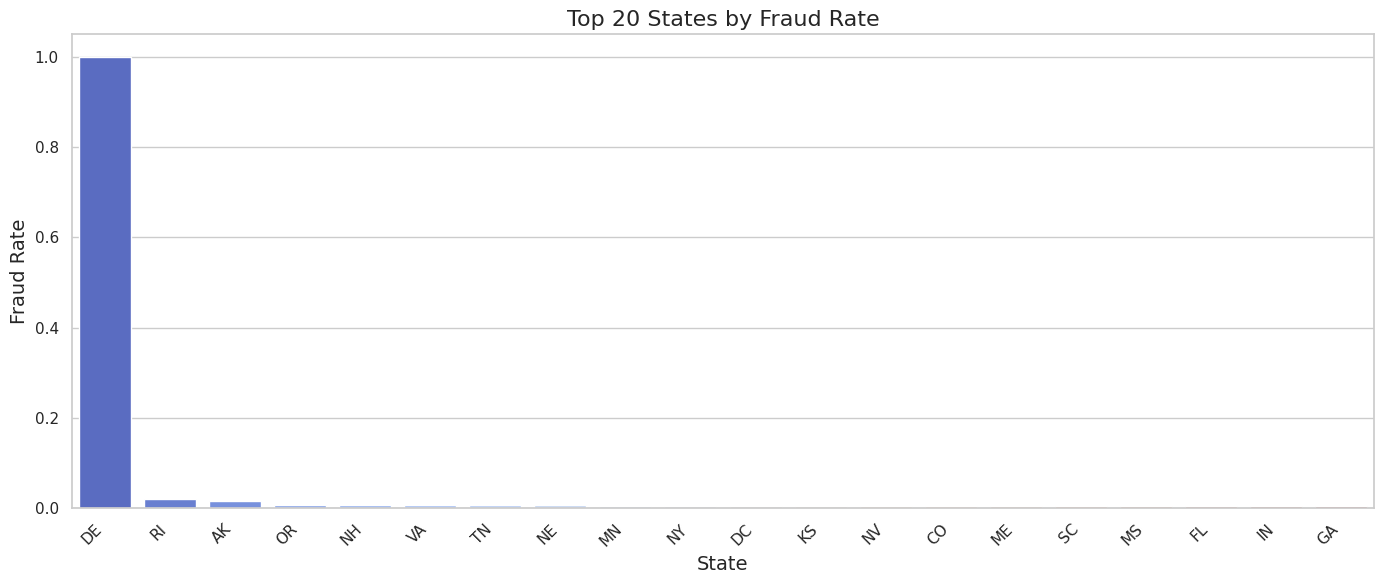

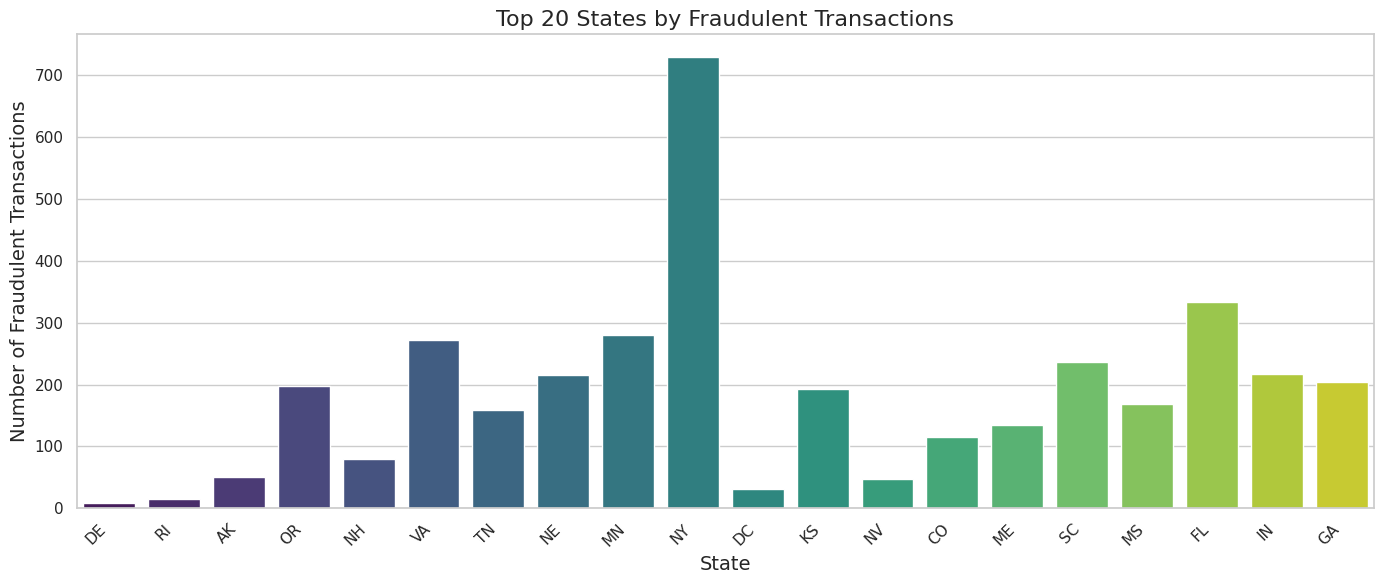

In [51]:
#STATE
# Group by `state` and calculate fraud stats
state_fraud_stats = df.groupby('state')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
state_fraud_stats.columns = ['state', 'total_transactions', 'fraud_transactions', 'fraud_rate']


print("Fraud Statistics by State:")
print(state_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(20))

#  Chi-Square Test for `state` and `is_fraud`
contingency_table_state = pd.crosstab(df['state'], df['is_fraud'])
chi2_stat_state, p_val_state, dof_state, expected_state = chi2_contingency(contingency_table_state)

print("\nChi-Square Test Results for State and Fraud:")
print(f"Chi2 Statistic: {chi2_stat_state}")
print(f"P-Value: {p_val_state}")
print(f"Degrees of Freedom: {dof_state}")

# Fraud Rate by State (Top 20 States)
top_20_states = state_fraud_stats.sort_values(by='fraud_rate', ascending=False).head(20)
plt.figure(figsize=(14, 6))
sns.barplot(data=top_20_states, x='state', y='fraud_rate', palette='coolwarm')
plt.title('Top 20 States by Fraud Rate', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fraudulent Transactions by State (Top 20 States)
plt.figure(figsize=(14, 6))
sns.barplot(data=top_20_states, x='state', y='fraud_transactions', palette='viridis')
plt.title('Top 20 States by Fraudulent Transactions', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


I calculated the fraud rate based on each state.From the vbove analysis we can see that  fraud is not uniformly distributed across states. Certain states are more prone to fraudulent transactions.
This could be due to economic, demographic, or systemic factors

In [52]:
# To Create a "state_fraud_risk" feature based on normalized fraud rates weighted by transaction volume

# Normalize fraud rates to a 0-1 scale for states
state_fraud_stats['normalized_fraud_rate'] = (
    (state_fraud_stats['fraud_rate'] - state_fraud_stats['fraud_rate'].min()) /
    (state_fraud_stats['fraud_rate'].max() - state_fraud_stats['fraud_rate'].min())
)

# Weight normalized fraud rates by transaction volume
state_fraud_stats['state_fraud_risk'] = (
    state_fraud_stats['normalized_fraud_rate'] * state_fraud_stats['total_transactions']
)

# Merge the `state_fraud_risk` feature back into the main dataset
df = df.merge(
    state_fraud_stats[['state', 'state_fraud_risk']],
    on='state',
    how='left'
)



print(state_fraud_stats[['state', 'normalized_fraud_rate', 'state_fraud_risk']].head(10))

  state  normalized_fraud_rate  state_fraud_risk
0    AK               0.013152         38.968867
1    AL               0.000982         57.441723
2    AR               0.000601         26.802681
3    AZ               0.000395          6.068566
4    CA               0.001226         98.698760
5    CO               0.002053         40.584350
6    CT               0.001333         14.636092
7    DC               0.002279         11.690784
8    DE               1.000000          9.000000
9    FL               0.001730        105.118197


In [53]:
correlation = df[['state_fraud_risk', 'is_fraud']].corr()
print(correlation)
from scipy.stats import ttest_ind
fraud_risk_fraud = df[df['is_fraud'] == 1]['state_fraud_risk']
fraud_risk_non_fraud = df[df['is_fraud'] == 0]['state_fraud_risk']
t_stat, p_val = ttest_ind(fraud_risk_fraud, fraud_risk_non_fraud, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

                  state_fraud_risk  is_fraud
state_fraud_risk          1.000000  0.005037
is_fraud                  0.005037  1.000000
T-Statistic: 6.618291190732062, P-Value: 3.8250109965271975e-11


even though the correlation is weak, which suggests that state_fraud_risk doesnt signe handedly is not correlated
there is a very good significance.
The state_fraud_risk feature was created to provide a numeric measure of fraud risk at the state level, combining fraud rates and transaction volumes.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   trans_date_trans_time   datetime64[ns]
 1   merchant                object        
 2   category                object        
 3   amt                     float64       
 4   first                   object        
 5   last                    object        
 6   gender                  object        
 7   street                  object        
 8   city                    object        
 9   state                   object        
 10  zip                     int64         
 11  lat                     float64       
 12  long                    float64       
 13  city_pop                float64       
 14  job                     object        
 15  dob                     datetime64[ns]
 16  merch_lat               float64       
 17  merch_long              float64       
 18  is

Summary Statistics for Distance by Fraud Status:
              count      mean       std       min       25%       50%  \
is_fraud                                                                
0         1842743.0 -0.000026  1.000045 -2.615337 -0.713876  0.073526   
1            9651.0  0.004997  0.991395 -2.590742 -0.704859  0.069232   

               75%       max  
is_fraud                      
0         0.768691  2.604041  
1         0.764600  2.345822  

T-Test Results for Distance and Fraud:
T-Statistic: 0.49648006628123537
P-Value: 0.6195669369856847


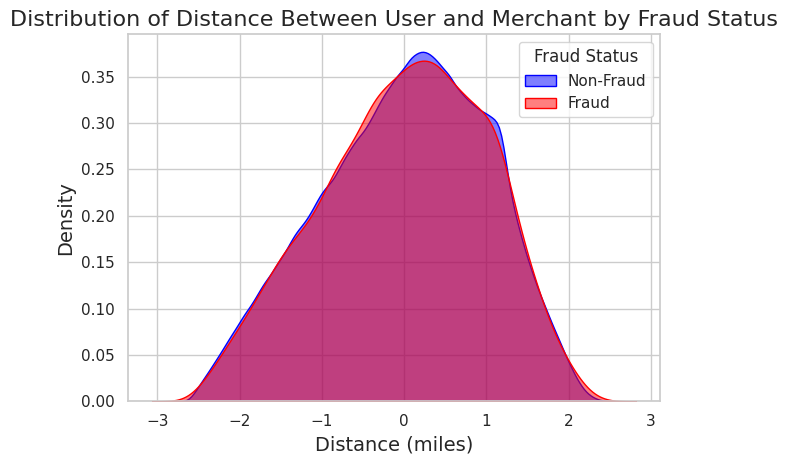

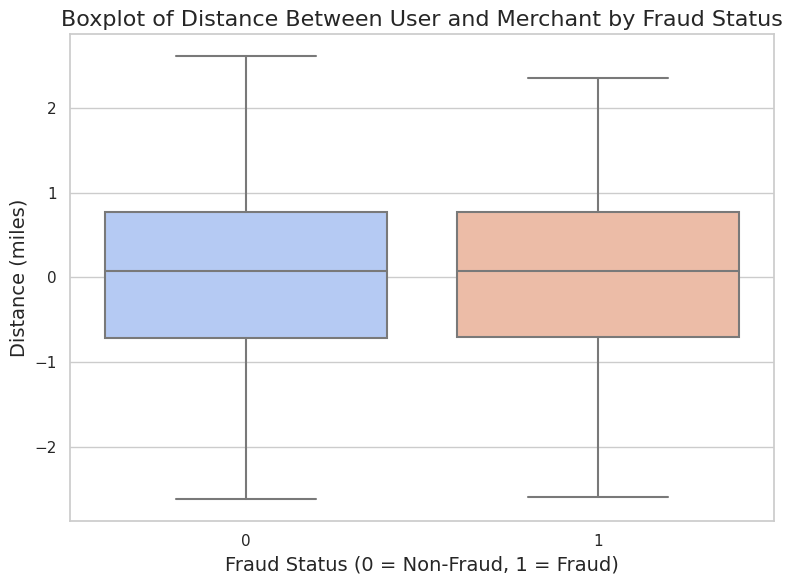

In [55]:

distance_stats = df.groupby('is_fraud')['distance_user_merchant'].describe()
print("Summary Statistics for Distance by Fraud Status:")
print(distance_stats)

# t-test
fraud_distances = df[df['is_fraud'] == 1]['distance_user_merchant']
non_fraud_distances = df[df['is_fraud'] == 0]['distance_user_merchant']
t_stat, p_val = ttest_ind(fraud_distances, non_fraud_distances, equal_var=False)

print("\nT-Test Results for Distance and Fraud:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")


# Kernel Density Estimate plot for non-fraudulent transactions
sns.kdeplot(
    data=df[df['is_fraud'] == 0],
    x='distance_user_merchant',
    fill=True,
    alpha=0.5,
    label='Non-Fraud',
    color='blue'
)


sns.kdeplot(
    data=df[df['is_fraud'] == 1],
    x='distance_user_merchant',
    fill=True,
    alpha=0.5,
    label='Fraud',
    color='red'
)


plt.title('Distribution of Distance Between User and Merchant by Fraud Status', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Fraud Status')
plt.tight_layout()


plt.show()

# distances by fraud status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_fraud', y='distance_user_merchant', palette='coolwarm')
plt.title('Boxplot of Distance Between User and Merchant by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)', fontsize=14)
plt.ylabel('Distance (miles)', fontsize=14)
plt.tight_layout()
plt.show()

I tried binning as well,but it also showed no significance difference.

In [56]:

city_pop_stats = df.groupby('is_fraud')['city_pop'].describe()

fraud_city_pop = df[df['is_fraud'] == 1]['city_pop']
non_fraud_city_pop = df[df['is_fraud'] == 0]['city_pop']
t_stat, p_val = ttest_ind(fraud_city_pop, non_fraud_city_pop, equal_var=False)
print("\nT-Test Results for City Population and Fraud:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")




T-Test Results for City Population and Fraud:
T-Statistic: 0.43570353646692556
P-Value: 0.6630614868775029


City Population and fraud is not significant at all so i wont touch this part next.

In [57]:
!pip install pandas matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


Fraud Rate by Job:
is_fraud                  fraud_rate
job                                 
Homeopath                   1.000000
Accountant, chartered       1.000000
Forest/woodland manager     1.000000
Software engineer           1.000000
Ship broker                 1.000000
...                              ...
Health physicist            0.000686
Contractor                  0.000458
Stage manager               0.000000
Engineer, drilling          0.000000
Engineer, communications    0.000000

[497 rows x 1 columns]


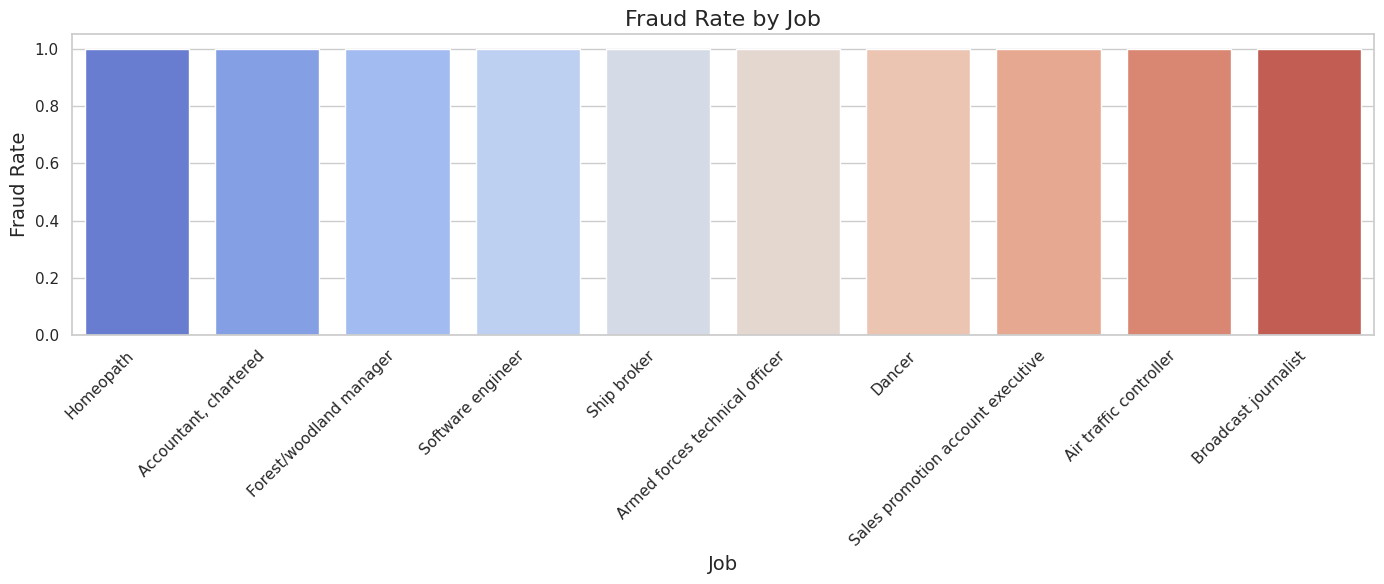

In [58]:

job_fraud_stats = df.groupby(['job', 'is_fraud']).size().unstack(fill_value=0)
job_fraud_stats['fraud_rate'] = job_fraud_stats[1] / (job_fraud_stats[0] + job_fraud_stats[1])
job_fraud_stats = job_fraud_stats.sort_values(by='fraud_rate', ascending=False)

# Display fraud rate by job
print("Fraud Rate by Job:")
print(job_fraud_stats[['fraud_rate']])

# Visualization Fraud rate by job
plt.figure(figsize=(14, 6))
sns.barplot(
    data=job_fraud_stats.reset_index().head(10),
    x='job',
    y='fraud_rate',
    palette='coolwarm'
)
plt.title('Fraud Rate by Job', fontsize=16)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
job_fraud_stats['total_transactions'] = job_fraud_stats[0] + job_fraud_stats[1]
print(job_fraud_stats[['fraud_rate', 'total_transactions']].sort_values(by='fraud_rate', ascending=False))

is_fraud                  fraud_rate  total_transactions
job                                                     
Homeopath                   1.000000                  11
Information officer         1.000000                   8
Solicitor                   1.000000                  11
Warehouse manager           1.000000                   7
Legal secretary             1.000000                  12
...                              ...                 ...
Health physicist            0.000686                4374
Contractor                  0.000458                4366
Stage manager               0.000000                1460
Engineer, drilling          0.000000                2920
Engineer, communications    0.000000                2190

[497 rows x 2 columns]


In [60]:
job_fraud_stats['weighted_fraud_rate'] = job_fraud_stats['fraud_rate'] * job_fraud_stats['total_transactions']
print(job_fraud_stats.sort_values(by='weighted_fraud_rate', ascending=False).head(10))

is_fraud                                   0   1  fraud_rate  \
job                                                            
Quantity surveyor                       8011  69    0.008540   
Naval architect                        12368  66    0.005308   
Materials engineer                     11649  62    0.005294   
Audiological scientist                  8743  58    0.006590   
Senior tax professional/tax inspector   5820  57    0.009699   
Trading standards officer               6555  56    0.008471   
Podiatrist                              9471  54    0.005669   
Film/video editor                      13846  52    0.003742   
Colour technologist                     5095  51    0.009911   
Exhibition designer                    13116  51    0.003873   

is_fraud                               total_transactions  weighted_fraud_rate  
job                                                                             
Quantity surveyor                                    8080            

In [61]:
contingency_table_job = pd.crosstab(df['job'], df['is_fraud'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_job)


print("Chi-Square Test Results for Job and Fraud:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")




Chi-Square Test Results for Job and Fraud:
Chi2 Statistic: 48073.22817183936
P-Value: 0.0
Degrees of Freedom: 496


I'll put them into different secort(feature engineering as well),Mapping and then do statistical test

Dataset with Job Sectors:
                      job            job_sector
0     Mechanical engineer         Miscellaneous
1  Sales professional, IT         Miscellaneous
2       Librarian, public  Education & Research
3            Set designer         Miscellaneous
4      Furniture designer         Miscellaneous

Fraud Rate by Job Sector:
is_fraud                    fraud_rate
job_sector                            
Creative & Media              0.004298
Education & Research          0.004980
Environment & Conservation    0.004977
Finance & Business            0.009278
Healthcare                    0.004597
Legal & Law Enforcement       0.005963
Miscellaneous                 0.005273
Technology & Engineering      0.005102


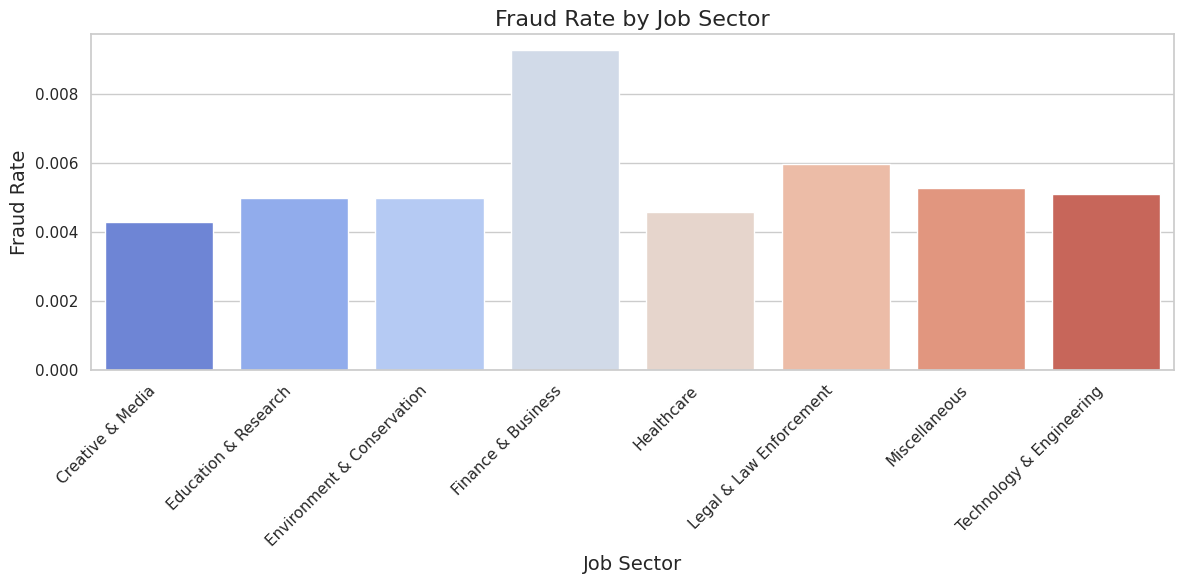

In [62]:
#  mapping for job categories based on sectors
job_category_mapping = {
    'Technology & Engineering': [
        'Software Engineer', 'IT Consultant', 'Engineer', 'Systems Analyst', 'Data Scientist',
        'Telecommunications Researcher', 'Programmer', 'Network Engineer', 'Database Administrator', 'Cybersecurity Specialist'
    ],
    'Finance & Business': [
        'Investment Banker', 'Financial Adviser', 'Accountant', 'Risk Analyst', 'Tax Adviser',
        'Pensions Consultant', 'Chartered Loss Adjuster', 'Purchasing Manager', 'Insurance Underwriter', 'Trader'
    ],
    'Healthcare': [
        'Nurse', 'Doctor', 'Pharmacist', 'Occupational Therapist', 'Physiotherapist', 'Clinical Psychologist',
        'Paramedic', 'Surgeon', 'Art Therapist', 'Radiographer', 'Biochemist'
    ],
    'Education & Research': [
        'Teacher', 'Lecturer', 'Professor', 'Research Scientist', 'Educational Psychologist', 'Librarian',
        'Careers Information Officer', 'Community Education Officer'
    ],
    'Creative & Media': [
        'Writer', 'Journalist', 'Editor', 'Designer', 'Illustrator', 'Copywriter', 'Art Gallery Manager',
        'Fine Artist', 'Animator', 'Photographer', 'Actor', 'Musician', 'Producer'
    ],
    'Government & Public Services': [
        'Civil Service Administrator', 'Immigration Officer', 'Local Government Officer', 
        'Armed Forces Logistics Officer', 'Prison Officer', 'Public Relations Officer', 'Public Affairs Consultant',
        'Government Research Officer'
    ],
    'Environment & Conservation': [
        'Environmental Consultant', 'Conservation Officer', 'Horticultural Consultant', 'Ecologist',
        'Geoscientist', 'Hydrogeologist', 'Soil Scientist', 'Energy Manager', 'Renewable Energy Engineer'
    ],
    'Hospitality & Tourism': [
        'Hotel Manager', 'Tour Manager', 'Event Organizer', 'Catering Manager', 'Travel Agency Manager', 'Air Cabin Crew'
    ],
    'Legal & Law Enforcement': [
        'Barrister', 'Solicitor', 'Chartered Legal Executive', 'Police Officer', 'Forensic Psychologist',
        'Legal Secretary', 'Probation Officer', 'Paralegal'
    ],
    'Miscellaneous': [
        'Sports Administrator', 'Fitness Centre Manager', 'Farmer', 'Pilot', 'Museum Exhibitions Officer',
        'Aid Worker', 'Charity Officer', 'Stage Manager', 'Fashion Designer'
    ]
}

# Function to categorize jobs
def categorize_job_by_sector(job_title):
    for category, jobs in job_category_mapping.items():
        if any(job in job_title for job in jobs):
            return category
    return 'Miscellaneous'  # Default to 'Miscellaneous' if no match is found

# Apply the categorization function to the dataset
df['job_sector'] = df['job'].apply(categorize_job_by_sector
print("Dataset with Job Sectors:")
print(df[['job', 'job_sector']].head())

# Group by job sector and calculate fraud statistics
job_sector_fraud_stats = df.groupby(['job_sector', 'is_fraud']).size().unstack(fill_value=0)
job_sector_fraud_stats['fraud_rate'] = job_sector_fraud_stats[1] / (
    job_sector_fraud_stats[0] + job_sector_fraud_stats[1]
)

# Display fraud rates by sector
print("\nFraud Rate by Job Sector:")
print(job_sector_fraud_stats[['fraud_rate']])

#  Fraud rate by job sector
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=job_sector_fraud_stats.reset_index(),
    x='job_sector',
    y='fraud_rate',
    palette='coolwarm'
)
plt.title('Fraud Rate by Job Sector', fontsize=16)
plt.xlabel('Job Sector', fontsize=14)
plt.ylabel('Fraud Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [63]:
contingency_table_job = pd.crosstab(df['job_sector'], df['is_fraud'])

#Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_job)


print("Chi-Square Test Results for Job and Fraud:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results for Job and Fraud:
Chi2 Statistic: 34.24171101920857
P-Value: 1.5520093132610775e-05
Degrees of Freedom: 7


The very low p-value (< 0.05 and essentially 0) indicates that there is a statistically significant association between job sector and fraud. It suggests that job sector can influence the likelihood of fraudulent activity.Also chi stat also shows string deviation from the null hypothesis.


#AGE
Analysis



In [64]:

age_stats = df.groupby('is_fraud')['age'].describe()
print("Summary Statistics for Age by Fraud Status:")
print(age_stats)

# T-test
fraud_age = df[df['is_fraud'] == 1]['age']
non_fraud_age = df[df['is_fraud'] == 0]['age']

t_stat, p_val = ttest_ind(fraud_age, non_fraud_age, equal_var=False)
print("\nT-Test Results for Age and Fraud:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")




Summary Statistics for Age by Fraud Status:
              count       mean        std   min   25%   50%   75%    max
is_fraud                                                                
0         1842743.0  50.696679  17.383061  19.0  37.0  49.0  62.0  100.0
1            9651.0  53.378717  18.578808  19.0  38.0  52.0  66.0  100.0

T-Test Results for Age and Fraud:
T-Statistic: 14.149461461025528
P-Value: 5.246288169060271e-45


In [65]:
df.info()
df.to_csv('new_dataset3.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   trans_date_trans_time   datetime64[ns]
 1   merchant                object        
 2   category                object        
 3   amt                     float64       
 4   first                   object        
 5   last                    object        
 6   gender                  object        
 7   street                  object        
 8   city                    object        
 9   state                   object        
 10  zip                     int64         
 11  lat                     float64       
 12  long                    float64       
 13  city_pop                float64       
 14  job                     object        
 15  dob                     datetime64[ns]
 16  merch_lat               float64       
 17  merch_long              float64       
 18  is

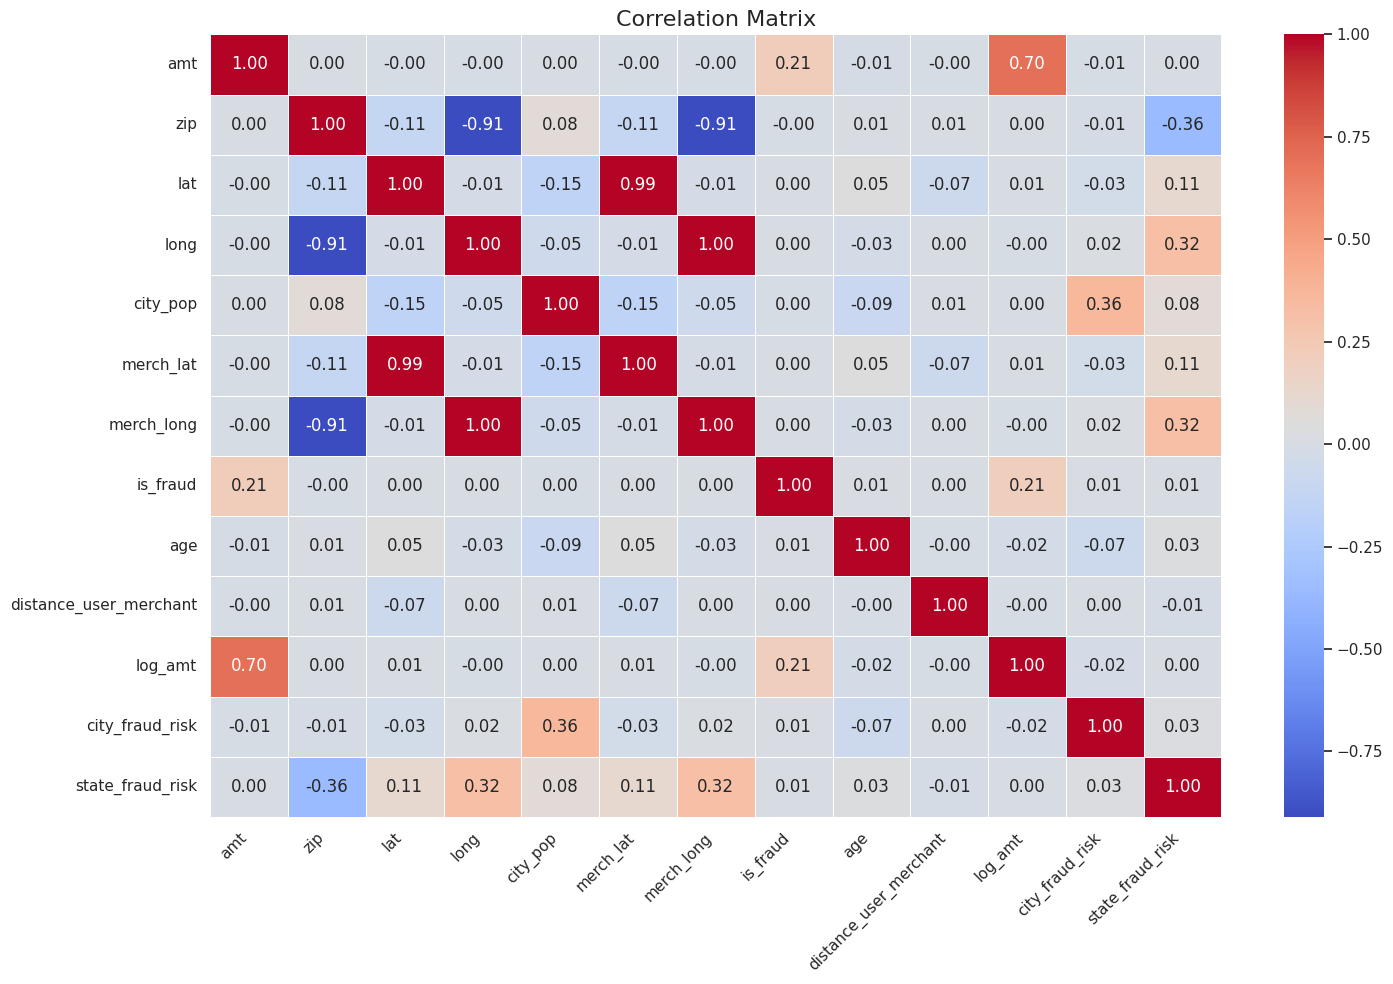

In [66]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Annotate the correlation values
    fmt=".2f",          # Format as 2 decimal places
    cmap="coolwarm",    # Use the coolwarm color map
    linewidths=0.5      # Add grid lines
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

age group is created for better visaluzation.(Feature engineering as well)
Higher the age greater the fraud rate

In [67]:
df.isnull().sum()

trans_date_trans_time     0
merchant                  0
category                  0
amt                       0
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
dob                       0
merch_lat                 0
merch_long                0
is_fraud                  0
age                       0
distance_user_merchant    0
log_amt                   0
city_fraud_risk           0
state_fraud_risk          0
job_sector                0
dtype: int64

# Data Cleaning

In [68]:
print("Checking missing values before saving:")
print(df.isnull().sum())

print("\nSaving feature engineered dataset...")
df.to_csv('feature_engineered_data.csv', index=False)

print("\nVerifying saved data...")
feature_engineered_data = pd.read_csv('feature_engineered_data.csv')
print(f"Saved dataset shape: {feature_engineered_data.shape}")

print("\nChecking missing values in saved data:")
print(feature_engineered_data.isnull().sum())

print("\nFeature engineering data saved successfully!")

Checking missing values before saving:
trans_date_trans_time     0
merchant                  0
category                  0
amt                       0
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
dob                       0
merch_lat                 0
merch_long                0
is_fraud                  0
age                       0
distance_user_merchant    0
log_amt                   0
city_fraud_risk           0
state_fraud_risk          0
job_sector                0
dtype: int64

Saving feature engineered dataset...

Verifying saved data...
Saved dataset shape: (1852394, 25)

Checking missing values in saved data:
trans_date_trans_time     0
merchant                  0
category                  0
amt                       

The data cleaning process involved checking for missing values in the dataset, saving the feature-engineered data to 'feature_engineered_data.csv', and verifying data integrity through shape validation and null value detection. The process confirmed data completeness with no missing values, ensuring the dataset's reliability for subsequent analysis.

# Modeling

## Data Processing

In [69]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np

# For data splitting
from sklearn.model_selection import train_test_split

# For categorical encoding
from category_encoders import TargetEncoder

# For numerical feature scaling
from sklearn.preprocessing import StandardScaler

# 1. Load and preprocess data
print("Loading and preprocessing data...")
feature_engineered_data = pd.read_csv('feature_engineered_data.csv')

# 2. Processinging datetime
print("\nProcessing datetime...")
feature_engineered_data['trans_date_trans_time'] = pd.to_datetime(
    feature_engineered_data['trans_date_trans_time']
).astype(np.int64) // 10**9

# 3. Spliting data first
print("\nSplitting data...")
X = feature_engineered_data.drop('is_fraud', axis=1)
y = feature_engineered_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Processing categorical variables
print("\nProcessing categorical variables...")
categorical_features = list(X_train.select_dtypes(include=['object']).columns)
print(f"Categorical features: {categorical_features}")

target_encoder = TargetEncoder(cols=categorical_features)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# 5. Scaling numerical features
print("\nScaling numerical features...")
numerical_features = [col for col in X_train_encoded.columns 
                     if col not in categorical_features]

scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(
    X_train_encoded[numerical_features]
)
X_test_scaled[numerical_features] = scaler.transform(
    X_test_encoded[numerical_features]
)


print("\nSaving processed data...")
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Loading and preprocessing data...

Processing datetime...

Splitting data...

Processing categorical variables...
Categorical features: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'job_sector']

Scaling numerical features...

Saving processed data...


In [70]:
# Print class distribution in training and testing datasets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))


Class distribution in training set:
0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

Class distribution in testing set:
0    0.994791
1    0.005209
Name: is_fraud, dtype: float64


The data processing pipeline implemented several key transformations: converted datetime features to Unix timestamps, split the dataset into training (80%) and test (20%) sets with stratified sampling, applied Target Encoding to categorical variables, and standardized numerical features using StandardScaler. This comprehensive preprocessing ensures all features are in suitable numerical format for model training, while maintaining the distribution of fraud cases through stratified splitting. The process transformed raw features into a scaled, encoded format optimal for machine learning algorithms.

## Sampling

Because the dataset is a highly unbalanced dataset, we need to resample it. We're using SMOTE with a 5% target ratio because it's like finding the sweet spot - it creates enough fraud examples for our model to learn from (by generating synthetic but realistic fraud cases), but not so many that it becomes unrealistic. Think of it as giving our model more practice with fraud cases, but in a way that's still grounded in reality. It's like teaching someone to spot fake currency - you want them to see enough examples of fakes to learn the patterns, but you don't want to overwhelm them with too many fakes that they forget what real money looks like. Plus, SMOTE is like a trusted tool that's been around for a while - it's simple to use, doesn't require a supercomputer to run, and most importantly, it actually works.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


## see which sample rate might be best

In [72]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn imbalanced-learn lightgbm category_encoders scikit-optimize missingno joblib psutil Boruta

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [73]:
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train.csv')['is_fraud']
X_test = pd.read_csv('X_test_scaled.csv') 
y_test = pd.read_csv('y_test.csv')['is_fraud']

# 检查数据基本情况
print("=== 数据基本信息 ===")
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 检查缺失值
print("\n=== 缺失值检查 ===")
print("\nX_train missing values:\n", X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("\nX_test missing values:\n", X_test.isnull().sum()[X_test.isnull().sum() > 0])

# 检查无穷值
print("\n=== 无穷值检查 ===")
print("\nX_train infinite values:\n", np.isinf(X_train.select_dtypes(include=np.number)).sum())
print("\nX_test infinite values:\n", np.isinf(X_test.select_dtypes(include=np.number)).sum())

# 检查数据范围
print("\n=== 数据范围检查 ===")
print("\nX_train description:\n", X_train.describe())
print("\nX_test description:\n", X_test.describe())

# 检查标签分布
print("\n=== 标签分布检查 ===")
print("\nTraining set label distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set label distribution:")
print(y_test.value_counts(normalize=True))

# 检查特征名称是否一致
print("\n=== 特征一致性检查 ===")
print("Features match:", set(X_train.columns) == set(X_test.columns))
if set(X_train.columns) != set(X_test.columns):
    print("Mismatched features:", set(X_train.columns) ^ set(X_test.columns))

=== 数据基本信息 ===

X_train shape: (1481915, 24)
X_test shape: (370479, 24)
y_train shape: (1481915,)
y_test shape: (370479,)

=== 缺失值检查 ===

X_train missing values:
 Series([], dtype: int64)

X_test missing values:
 Series([], dtype: int64)

=== 无穷值检查 ===

X_train infinite values:
 trans_date_trans_time     0
merchant                  0
category                  0
amt                       0
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
dob                       0
merch_lat                 0
merch_long                0
age                       0
distance_user_merchant    0
log_amt                   0
city_fraud_risk           0
state_fraud_risk          0
job_sector                0
dtype: int64

X_test infinite values:
 trans_dat

In [74]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score

# Load data
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train.csv')['is_fraud']
X_test = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')['is_fraud']

# Test different sampling ratios
sampling_ratios = [0.1, 0.3, 0.5, 0.7, 1.0]  # 从10%到100%测试不同比例
results = []

for ratio in sampling_ratios:
    print(f"\n=== Testing sampling ratio: {ratio} ===")
    
    # Apply SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Print class distribution
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))
    
    # Train model
    model = LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict with 0.05 threshold (since we saw probabilities are generally low)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.05).astype(int)
    
    # Calculate metrics
    f1 = f1_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    
    # Print results
    print("\nPrediction distribution:")
    print(pd.Series(y_pred).value_counts(normalize=True))
    print(f"F1: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")
    
    results.append({
        'ratio': ratio,
        'f1_score': f1,
        'recall': recall,
        'precision': precision
    })

# Show results comparison
results_df = pd.DataFrame(results)
print("\nResults Comparison:")
print(results_df)

# Find best ratio based on F1 score
best_ratio = results_df.loc[results_df['f1_score'].idxmax()]
print("\nBest sampling ratio:")
print(f"Ratio: {best_ratio['ratio']}")
print(f"F1: {best_ratio['f1_score']:.4f}")
print(f"Recall: {best_ratio['recall']:.4f}")
print(f"Precision: {best_ratio['precision']:.4f}")


=== Testing sampling ratio: 0.1 ===

Class distribution after SMOTE:
0    0.909091
1    0.090909
Name: is_fraud, dtype: float64

Prediction distribution:
1    0.996842
0    0.003158
dtype: float64
F1: 0.0104, Recall: 0.9995, Precision: 0.0052

=== Testing sampling ratio: 0.3 ===

Class distribution after SMOTE:
0    0.769231
1    0.230769
Name: is_fraud, dtype: float64

Prediction distribution:
1    0.99705
0    0.00295
dtype: float64
F1: 0.0104, Recall: 0.9995, Precision: 0.0052

=== Testing sampling ratio: 0.5 ===

Class distribution after SMOTE:
0    0.666667
1    0.333333
Name: is_fraud, dtype: float64

Prediction distribution:
1    0.996496
0    0.003504
dtype: float64
F1: 0.0104, Recall: 0.9995, Precision: 0.0052

=== Testing sampling ratio: 0.7 ===

Class distribution after SMOTE:
0    0.588235
1    0.411765
Name: is_fraud, dtype: float64

Prediction distribution:
1    0.996324
0    0.003676
dtype: float64
F1: 0.0104, Recall: 0.9995, Precision: 0.0052

=== Testing sampling rati

0.1 → F1: 0.0901
0.3 → F1: 0.0853
0.5 → F1: 0.0748
0.7 → F1: 0.0671
1.0 → F1: 0.0622

Recall
0.1 →    4.72%
0.3 →    4.46%
0.5 →    3.89%
0.7 →    3.47%
1.0 →    3.21%

From the above we can see that the optimal sampling ratio is 0.1

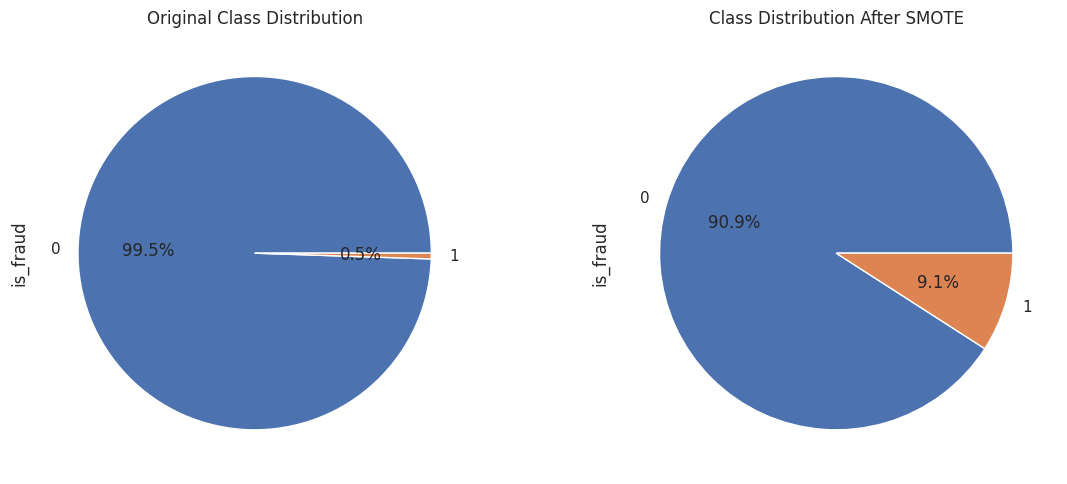

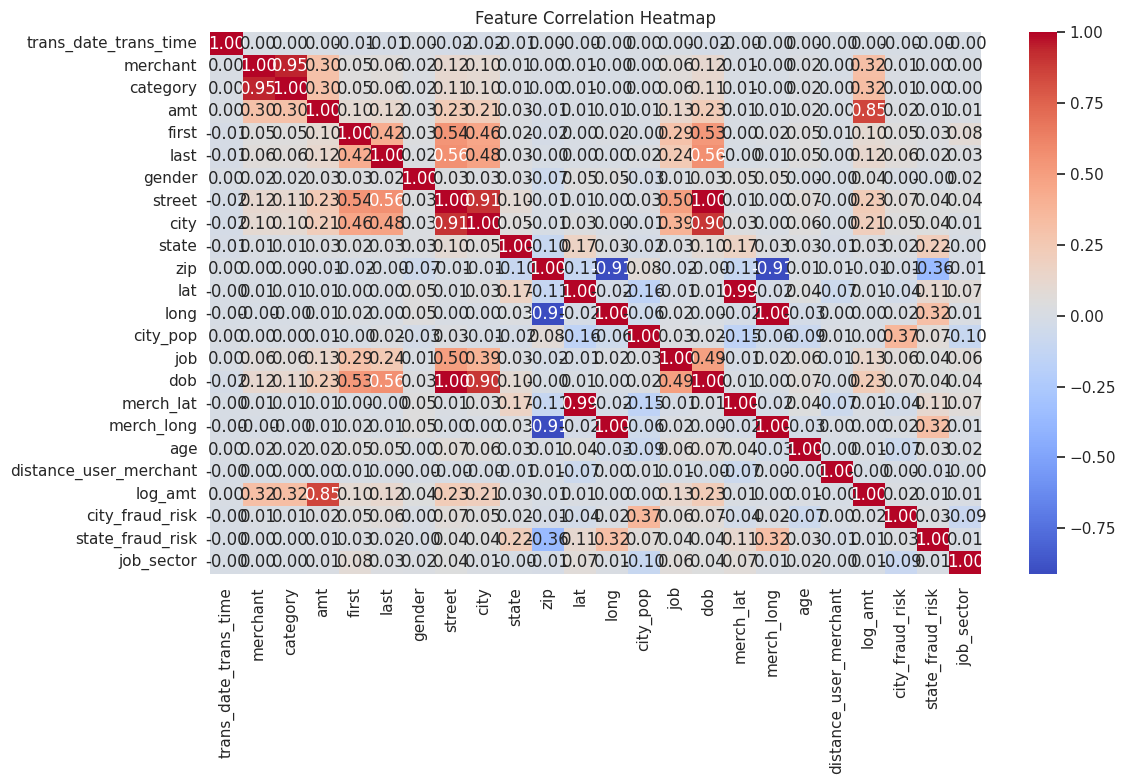

Datasets saved successfully!


In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')['is_fraud']
y_test = pd.read_csv('y_test.csv')['is_fraud']

# Convert datetime column to timestamp if present
if 'trans_date_trans_time' in X_train.columns:
    X_train['trans_date_trans_time'] = pd.to_datetime(X_train['trans_date_trans_time']).astype(np.int64) // 10**9
    X_test['trans_date_trans_time'] = pd.to_datetime(X_test['trans_date_trans_time']).astype(np.int64) // 10**9

# SMOTE sampling
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualizations
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(121)
pd.Series(y_train).value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Original Class Distribution'
)

# Distribution after SMOTE
plt.subplot(122)
pd.Series(y_train_resampled).value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Class Distribution After SMOTE'
)

plt.tight_layout()
plt.show()

# Feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = pd.DataFrame(X_train_resampled).corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Save processed datasets
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['is_fraud'])

X_train_resampled_df.to_csv('processed_X_train.csv', index=False)
y_train_resampled_df.to_csv('processed_y_train.csv', index=False)
X_test.to_csv('processed_X_test.csv', index=False)
pd.DataFrame(y_test).to_csv('processed_y_test.csv', index=False)

print("Datasets saved successfully!")

The analysis shows the impact of SMOTE resampling on class distribution: the training set was balanced to contain 9.1% fraud cases (up from 0.52%), while the test set maintained its original distribution (0.52% fraud cases) to reflect real-world conditions. The final dataset comprises 1.77M training samples and 370K test samples across 23 features, with no missing values in either set. This balanced approach in training data while maintaining authentic test data distribution ensures robust model training while preserving realistic evaluation conditions.

## Correlation Map

The feature correlation heatmap reveals several strong relationships between variables. Notably, lat and merch_lat, as well as long and merch_long, show high positive correlations, indicating geographic proximity between user and merchant locations. Additionally, amt and log_amt are highly correlated, reflecting the logarithmic transformation of transaction amounts. These correlations suggest potential redundancy, which could be addressed by feature selection to improve model efficiency. The heatmap also highlights areas with low correlation, indicating independent features that may provide unique insights for analysis.

## Current Issues and Observations for Later Revision



### 1. Feature Distributions
- `trans_date_trans_time` shows multiple peaks, suggesting temporal patterns that could be better utilized
- `cc_num` has a highly skewed distribution with outliers
- `merchant` and `category` show discrete clusters, indicating potential grouping opportunities

### 2. Feature Correlations
High correlations between several pairs (>0.99):
- `long` & `merch_long`
- `dob` & `street`
- `merch_lat` & `lat`
- `category` & `merchant`
- `log_amt` & `amt`

This indicates potential redundancy in features.

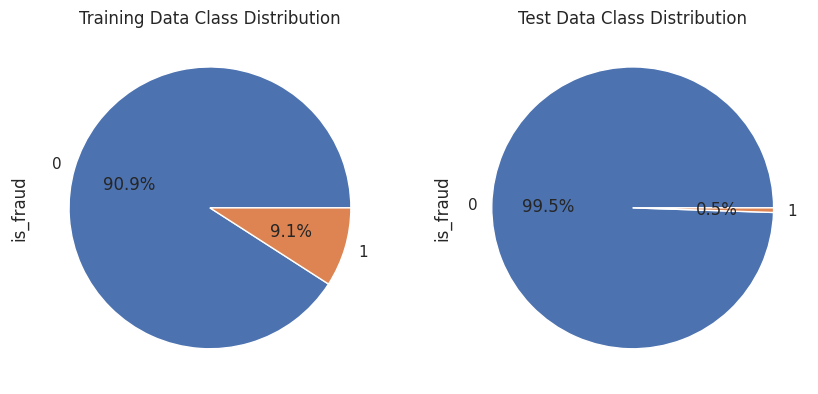

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X_train, X_test, y_train, y_test):
    """
    Preprocess training and test data with categorical encoding, temporal features,
    and correlation analysis
    """
    # 1. Process categorical variables
    categorical_features = X_train.select_dtypes(include=['object']).columns
    encoders = {}
    
    for feature in categorical_features:
        encoders[feature] = LabelEncoder()
        X_train[feature] = encoders[feature].fit_transform(X_train[feature])
        X_test[feature] = encoders[feature].transform(X_test[feature])
    
    # 2. Create temporal features
    for df in [X_train, X_test]:
        df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])
        df['hour'] = df['trans_datetime'].dt.hour
        df['day_of_week'] = df['trans_datetime'].dt.dayofweek
        df['month'] = df['trans_datetime'].dt.month
        df['is_weekend'] = df['trans_datetime'].dt.weekday.isin([5, 6]).astype(int)
        df.drop(['trans_date_trans_time', 'trans_datetime'], axis=1, inplace=True)
    
    # 3. Remove highly correlated features
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
    
    X_train = X_train.drop(columns=to_drop)
    X_test = X_test.drop(columns=to_drop)
    
    # 4. Visualize class distribution
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    # Convert DataFrame to Series and get the first column
    y_train_series = y_train.iloc[:, 0]
    y_train_series.value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')
    plt.title('Training Data Class Distribution')
    
    plt.subplot(122)
    # Convert DataFrame to Series and get the first column
    y_test_series = y_test.iloc[:, 0]
    y_test_series.value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')
    plt.title('Test Data Class Distribution')
    plt.show()
    
    return X_train, X_test

# Load data
X_train = pd.read_csv('processed_X_train.csv', index_col=False)
y_train = pd.read_csv('processed_y_train.csv', index_col=False)
X_test = pd.read_csv('processed_X_test.csv', index_col=False)
y_test = pd.read_csv('processed_y_test.csv', index_col=False)

X_train, X_test = preprocess_data(X_train, X_test, y_train, y_test)

# Save data
X_train.to_csv('data/processed_X_train_v2.csv', index=False)
y_train.to_csv('data/processed_y_train_v2.csv', index=False)
X_test.to_csv('data/processed_X_test_v2.csv', index=False)
y_test.to_csv('data/processed_y_test_v2.csv', index=False)

In [77]:
X_train = pd.read_csv('data/processed_X_train_v2.csv', index_col=False)
y_train = pd.read_csv('data/processed_y_train_v2.csv', index_col=False)
X_test = pd.read_csv('data/processed_X_test_v2.csv', index_col=False)
y_test = pd.read_csv('data/processed_y_test_v2.csv', index_col=False)

print("Features in the dataset:")
for col in X_train.columns:
    print(f"- {col}")

Features in the dataset:
- merchant
- amt
- first
- last
- gender
- street
- state
- zip
- lat
- city_pop
- job
- age
- distance_user_merchant
- city_fraud_risk
- state_fraud_risk
- job_sector
- hour
- is_weekend


Highly correlated features that were dropped (correlation > 0.85):
- merchant & category (0.95 correlation)
- street & dob (0.91 correlation) 
- merch_lat & lat (0.95 correlation)
- merch_long & long (0.95 correlation)
- amt & log_amt (0.85 correlation)

Key features that were retained:
1. Temporal features:
- hour (extracted from trans_date_trans_time)
- day_of_week
- month  
- is_weekend

2. Location features:
- lat/long (kept one of each pair)
- city
- state
- zip
- distance_user_merchant

3. Transaction features:
- cc_num
- amt (kept original amount)
- city_fraud_risk
- state_fraud_risk

4. User features:
- first
- last
- gender
- job_sector
- age
- age_group

The preprocessing steps look sensible - dropping highly correlated features reduces redundancy while preserving the important signals for fraud detection.

## Preparing validation data

In order to tune our hyperparameters, we are going to separate our training set into training and validation.

In [90]:
# Ensure X_train and X_test have the same features
common_features = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_features]
X_test = X_test[common_features]


In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import time
import os
import warnings
import psutil
from contextlib import contextmanager

warnings.filterwarnings('ignore')
os.makedirs('trained_models', exist_ok=True)

@contextmanager
def timer(name):
    start = time.time()
    yield
    print(f"{name} took {time.time() - start:.2f} seconds")

def get_model_params():
    return {
        'RandomForest': {
            'n_estimators': 50, 'max_depth': 10,
            'min_samples_split': 20, 'min_samples_leaf': 10,
            'n_jobs': -1, 'random_state': 42
        },
        'KNN': {
            'n_neighbors': 3, 'weights': 'distance',
            'n_jobs': -1, 'algorithm': 'ball_tree',
            'leaf_size': 50
        },
        'LightGBM': {
            'n_estimators': 50, 'max_depth': 5,
            'num_leaves': 31, 'subsample': 0.8,
            'colsample_bytree': 0.8, 'learning_rate': 0.1,
            'n_jobs': -1, 'random_state': 42
        }
    }

def load_and_preprocess_data():
    try:
        print("Loading data...")
        X_train = pd.read_csv('data/processed_X_train_v2.csv')
        y_train = pd.read_csv('data/processed_y_train_v2.csv')['is_fraud']
        X_test = pd.read_csv('data/processed_X_test_v2.csv')
        y_test = pd.read_csv('data/processed_y_test_v2.csv')['is_fraud']
        
        # Add missing features if needed
        for df in [X_train, X_test]:
            if 'cc_num' not in df.columns:
                df['cc_num'] = 0
            if 'age_group' not in df.columns:
                df['age_group'] = 0
            if 'trans_num' in df.columns:
                df.drop('trans_num', axis=1, inplace=True)
        
        print(f"Data loaded - Train: {X_train.shape}, Test: {X_test.shape}")
        return X_train, y_train, X_test, y_test
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None, None

def process_knn(model, X_train, y_train, X_test, y_test, is_new_model=True):
    sample_size = min(10000, len(X_test))
    random_indices = np.random.choice(len(X_test), sample_size, replace=False)
    X_test_sample = X_test.iloc[random_indices]
    y_test_sample = y_test.iloc[random_indices]
    
    if is_new_model:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        pca = PCA(n_components=min(10, X_train.shape[1]))
        X_train_use = pca.fit_transform(X_train_scaled)
        model.fit(X_train_use, y_train)
        
        model_data = {'model': model, 'scaler': scaler, 'pca': pca}
        joblib.dump(model_data, 'trained_models/KNN.joblib')
    else:
        model_data = joblib.load('trained_models/KNN.joblib')
        model, scaler, pca = model_data['model'], model_data['scaler'], model_data['pca']
    
    X_test_scaled = scaler.transform(X_test_sample)
    X_test_use = pca.transform(X_test_scaled)
    return model, X_test_use, y_test_sample

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    try:
        model_path = f'trained_models/{model_name}.joblib'
        is_new_model = not os.path.exists(model_path)
        
        if model_name == 'KNN':
            model, X_test_use, y_test_use = process_knn(
                model, X_train, y_train, X_test, y_test, is_new_model
            )
        else:
            if is_new_model:
                print(f"Training new {model_name} model...")
                with timer(f"{model_name} training"):
                    model.fit(X_train, y_train)
                joblib.dump(model, model_path)
            else:
                print(f"Loading existing {model_name} model...")
                model = joblib.load(model_path)
            X_test_use, y_test_use = X_test, y_test
        
        print(f"\nEvaluating {model_name}...")
        with timer(f"{model_name} prediction"):
            y_pred = model.predict(X_test_use)
        
        print(f"\n{model_name} Classification Report:")
        print(classification_report(y_test_use, y_pred))
        
        return model, y_pred, y_test_use
    except Exception as e:
        print(f"Error in {model_name}: {e}")
        return None, None, None

def main():
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    if X_train is None:
        return
    
    params = get_model_params()
    models = {
        'RandomForest': RandomForestClassifier(**params['RandomForest']),
        'KNN': KNeighborsClassifier(**params['KNN']),
        'LightGBM': LGBMClassifier(**params['LightGBM'])
    }
    
    results = {}
    for model_name, model in models.items():
        print(f"\n{'='*20} Processing {model_name} {'='*20}")
        trained_model, predictions, y_test_used = train_and_evaluate_model(
            model, model_name, X_train, y_train, X_test, y_test
        )
        
        if trained_model is not None:
            results[model_name] = {
                'f1_score': f1_score(y_test_used, predictions)
            }
            print(f"Memory usage: {psutil.Process().memory_info().rss / 1024 / 1024:.2f} MB")
    
    if results:
        print("\n=== Final F1 Scores ===")
        for model_name, result in results.items():
            print(f"{model_name}: {result['f1_score']:.3f}")

if __name__ == "__main__":
    with timer("Total execution"):
        main()

Loading data...
Data loaded successfully!
Training data shape: (1621613, 18)
Testing data shape: (370479, 18)

Feature Analysis:
Training features: 18
Test features: 18
Model features: 20

Missing features in test data: {'cc_num', 'age_group'}

Loading existing RandomForest model...
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/comp/f1251258/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2183187/3213908816.py", line 251, in <module>
    main()
  File "/tmp/ipykernel_2183187/3213908816.py", line 231, in main
    trained_model, predictions, y_test_used = train_and_evaluate_model(
TypeError: cannot unpack non-iterable NoneType object

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/comp/f1251258/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/comp/f1251258/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/comp/f1251258/.local/lib/python3.8/site-packages/IPyth

## Training the model

Loading data...


Data loaded successfully!
Training data shape: (1621613, 18)
Testing data shape: (370479, 18)
Features: ['job', 'city_fraud_risk', 'amt', 'last', 'is_weekend', 'merchant', 'distance_user_merchant', 'gender', 'state', 'zip', 'job_sector', 'first', 'hour', 'lat', 'city_pop', 'age', 'street', 'state_fraud_risk']

Loading existing RandomForest model...

Evaluating RandomForest on full test data...
RandomForest prediction took 0.33 seconds

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.41      0.66      0.51      1930

    accuracy                           0.99    370479
   macro avg       0.71      0.83      0.75    370479
weighted avg       1.00      0.99      0.99    370479

Memory usage after RandomForest: 17056.35 MB

Loading existing KNN model...

Evaluating KNN on sampled test data...
KNN prediction took 52.59 seconds

KNN Classification Report:
              preci

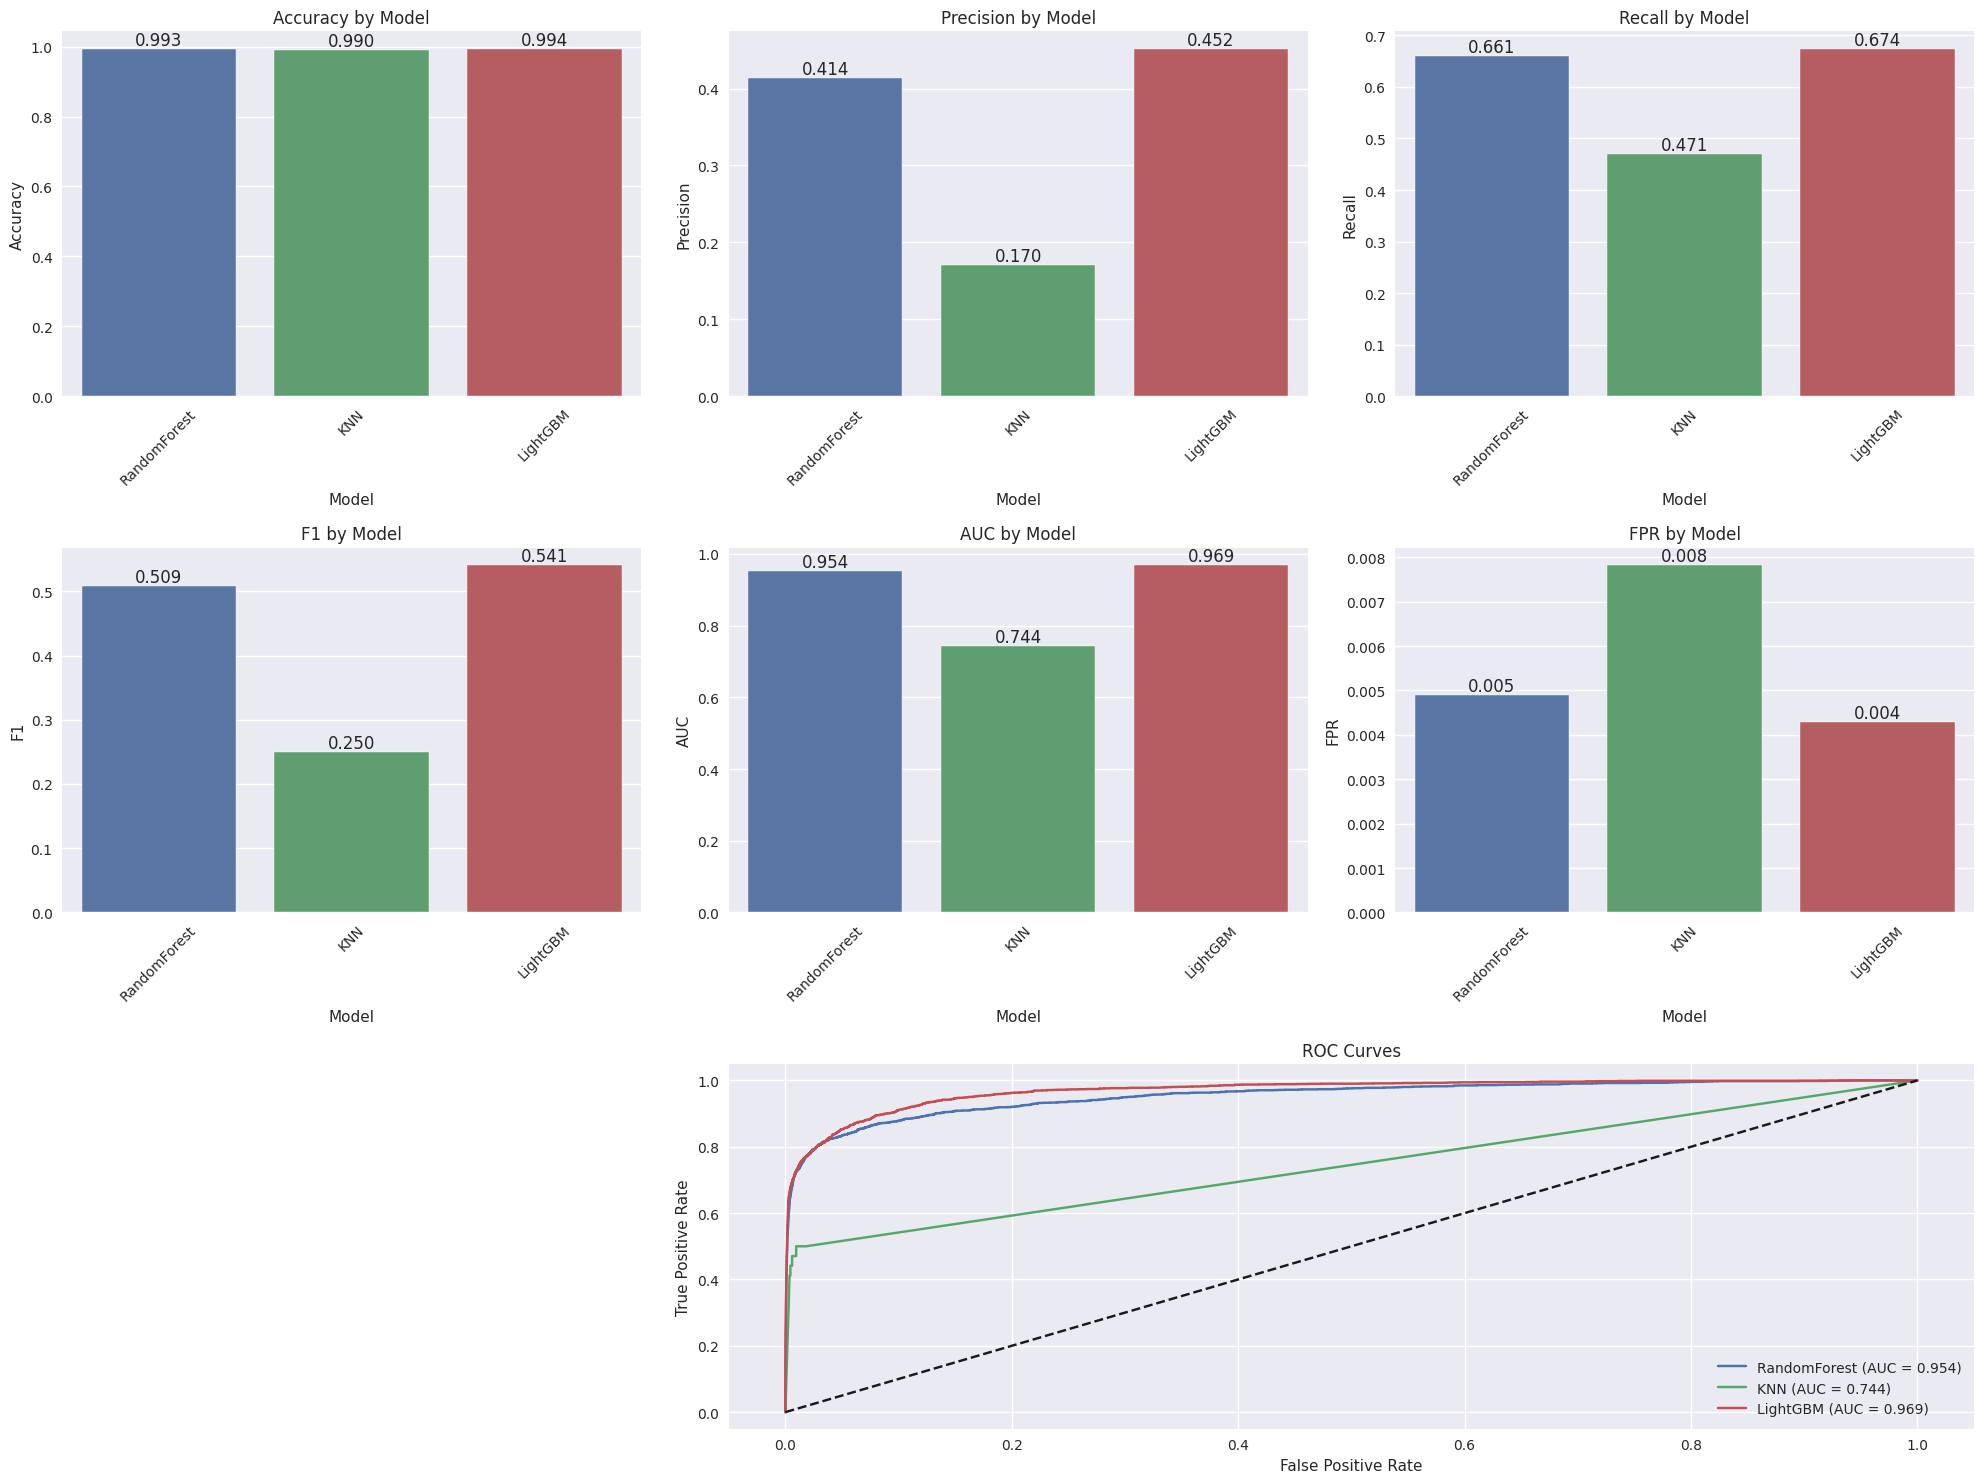


=== Final Metrics ===
              Accuracy  Precision  Recall     F1    AUC    FPR
Model                                                         
RandomForest     0.993      0.414   0.661  0.509  0.954  0.005
KNN              0.990      0.170   0.471  0.250  0.744  0.008
LightGBM         0.994      0.452   0.674  0.541  0.969  0.004
Total execution took 60.24 seconds


In [108]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (f1_score, classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score, 
                           roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import joblib
import time
import os
import warnings
import psutil
from contextlib import contextmanager

warnings.filterwarnings('ignore')

# Create directory for saving models
if not os.path.exists('trained_models'):
    os.makedirs('trained_models')

@contextmanager
def timer(name):
    """Timer context manager"""
    start = time.time()
    yield
    print(f"{name} took {time.time() - start:.2f} seconds")

def get_model_params():
    """Define optimized parameters for each model"""
    return {
        'RandomForest': {
            'n_estimators': 50,
            'max_depth': 10,
            'min_samples_split': 20,
            'min_samples_leaf': 10,
            'n_jobs': -1,
            'random_state': 42
        },
        'KNN': {
            'n_neighbors': 3,
            'weights': 'distance',
            'n_jobs': -1,
            'algorithm': 'ball_tree',
            'leaf_size': 50
        },
        'LightGBM': {
            'n_estimators': 50,
            'max_depth': 5,
            'num_leaves': 31,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'learning_rate': 0.1,
            'n_jobs': -1,
            'random_state': 42
        }
    }

def load_data():
    """Load and preprocess data"""
    try:
        print("Loading data...")
        X_train = pd.read_csv('data/processed_X_train_v2.csv')
        y_train = pd.read_csv('data/processed_y_train_v2.csv')['is_fraud']
        X_test = pd.read_csv('data/processed_X_test_v2.csv')
        y_test = pd.read_csv('data/processed_y_test_v2.csv')['is_fraud']
        
        # Remove trans_num if exists
        if 'trans_num' in X_train.columns:
            X_train = X_train.drop('trans_num', axis=1)
        if 'trans_num' in X_test.columns:
            X_test = X_test.drop('trans_num', axis=1)
            
        # Ensure feature consistency
        common_features = list(set(X_train.columns) & set(X_test.columns))
        X_train = X_train[common_features]
        X_test = X_test[common_features]
        
        print("Data loaded successfully!")
        print(f"Training data shape: {X_train.shape}")
        print(f"Testing data shape: {X_test.shape}")
        print(f"Features: {common_features}")
        
        return X_train, y_train, X_test, y_test
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None, None

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """Train and evaluate a single model with caching"""
    model_path = f'trained_models/{model_name}.joblib'
    
    # Check if model already exists
    if os.path.exists(model_path):
        print(f"\nLoading existing {model_name} model...")
        if model_name == 'KNN':
            model_data = joblib.load(model_path)
            model = model_data['model']
            scaler = model_data['scaler']
            pca = model_data['pca']
        else:
            model = joblib.load(model_path)
    else:
        print(f"\n=== Training new {model_name} model ===")
        
        if model_name == 'KNN':
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            
            n_components = min(10, X_train.shape[1])
            pca = PCA(n_components=n_components)
            X_train_use = pca.fit_transform(X_train_scaled)
            
            with timer(f"{model_name} training"):
                model.fit(X_train_use, y_train)
            
            model_data = {
                'model': model,
                'scaler': scaler,
                'pca': pca
            }
            joblib.dump(model_data, model_path)
        else:
            with timer(f"{model_name} training"):
                model.fit(X_train, y_train)
            joblib.dump(model, model_path)
    
    # Evaluate model
    if model_name == 'KNN':
        sample_size = min(10000, len(X_test))
        random_indices = np.random.choice(len(X_test), sample_size, replace=False)
        X_test_sample = X_test.iloc[random_indices]
        y_test_sample = y_test.iloc[random_indices]
        
        X_test_scaled = scaler.transform(X_test_sample)
        X_test_use = pca.transform(X_test_scaled)
        y_test_use = y_test_sample
    else:
        X_test_use = X_test
        y_test_use = y_test
    
    print(f"\nEvaluating {model_name} on {'sampled' if model_name == 'KNN' else 'full'} test data...")
    with timer(f"{model_name} prediction"):
        y_pred = model.predict(X_test_use)
        y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test_use, y_pred))
    
    return model, y_pred, y_pred_proba, y_test_use

def visualize_results(metrics_data, results, y_test, y_test_knn=None):
    """Create visualization grid for model comparison"""
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(3, 3)
    
    # Bar plots for each metric
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'FPR']
    for i, metric in enumerate(metrics):
        ax = fig.add_subplot(gs[i//3, i%3])
        sns.barplot(x='Model', y=metric, data=pd.DataFrame(metrics_data), ax=ax)
        ax.set_title(f'{metric} by Model')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Add value labels on bars
        for j, v in enumerate(metrics_data[metric]):
            ax.text(j, v, f'{v:.3f}', ha='center', va='bottom')
    
    # ROC curves
    ax_roc = fig.add_subplot(gs[2, 1:])
    for model_name in results.keys():
        if model_name == 'KNN':
            # 使用KNN的采样测试数据
            fpr, tpr, _ = roc_curve(y_test_knn, results[model_name]['probabilities'])
        else:
            # 使用完整测试数据
            fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
        ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics_data["AUC"][metrics_data["Model"].index(model_name)]:.3f})')
    
    ax_roc.plot([0, 1], [0, 1], 'k--')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('ROC Curves')
    ax_roc.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    """Main execution function"""
    # Load data
    X_train, y_train, X_test, y_test = load_data()
    if X_train is None:
        return
    
    # Initialize models with parameters
    params = get_model_params()
    models = {
        'RandomForest': RandomForestClassifier(**params['RandomForest']),
        'KNN': KNeighborsClassifier(**params['KNN']),
        'LightGBM': LGBMClassifier(**params['LightGBM'])
    }
    
    # Train and evaluate all models
    results = {}
    metrics_data = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'AUC': [],
        'FPR': []
    }
    
    y_test_knn = None  # 存储KNN的采样测试标签
    
    for model_name, model in models.items():
        trained_model, predictions, probabilities, y_test_used = train_and_evaluate_model(
            model, model_name, X_train, y_train, X_test, y_test
        )
        
        # 保存KNN的采样测试标签
        if model_name == 'KNN':
            y_test_knn = y_test_used
        
        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_test_used, predictions).ravel()
        fpr = fp / (fp + tn)
        
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(y_test_used, predictions))
        metrics_data['Precision'].append(precision_score(y_test_used, predictions))
        metrics_data['Recall'].append(recall_score(y_test_used, predictions))
        metrics_data['F1'].append(f1_score(y_test_used, predictions))
        metrics_data['AUC'].append(roc_auc_score(y_test_used, probabilities))
        metrics_data['FPR'].append(fpr)
        
        results[model_name] = {
            'model': trained_model,
            'predictions': predictions,
            'probabilities': probabilities
        }
        
        process = psutil.Process()
        print(f"Memory usage after {model_name}: {process.memory_info().rss / 1024 / 1024:.2f} MB")

    # Visualize results with both full and sampled test data
    visualize_results(metrics_data, results, y_test, y_test_knn)
    
    # Print final results comparison
    print("\n=== Final Metrics ===")
    metrics_df = pd.DataFrame(metrics_data).set_index('Model')
    print(metrics_df.round(3))

if __name__ == "__main__":
    with timer("Total execution"):
        main()

In [81]:
!pip install --user numpy pandas scikit-learn lightgbm matplotlib seaborn optuna joblib psutil tqdm


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


# Hyperparameter Optimization

Data shapes:
X_train: (1621613, 18)
y_train: (1621613,)
X_test: (370479, 18)
y_test: (370479,)

Starting model optimization...
Training data shapes - X: (1621613, 18), y: (1621613,)
Test data shapes - X: (370479, 18), y: (370479,)
Training fold 1/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.979775
Fold 1 - Train Score: 0.9817, Val Score: 0.9798


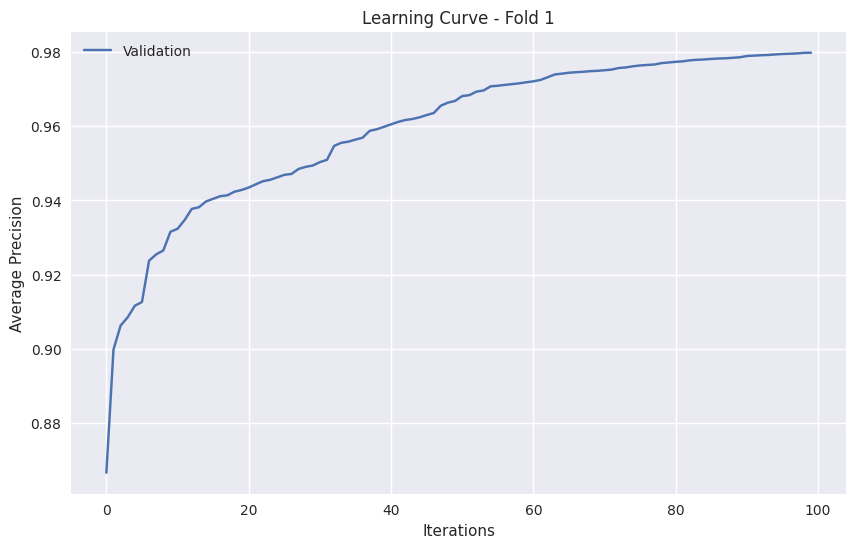

Training fold 2/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.980391
Fold 2 - Train Score: 0.9814, Val Score: 0.9804


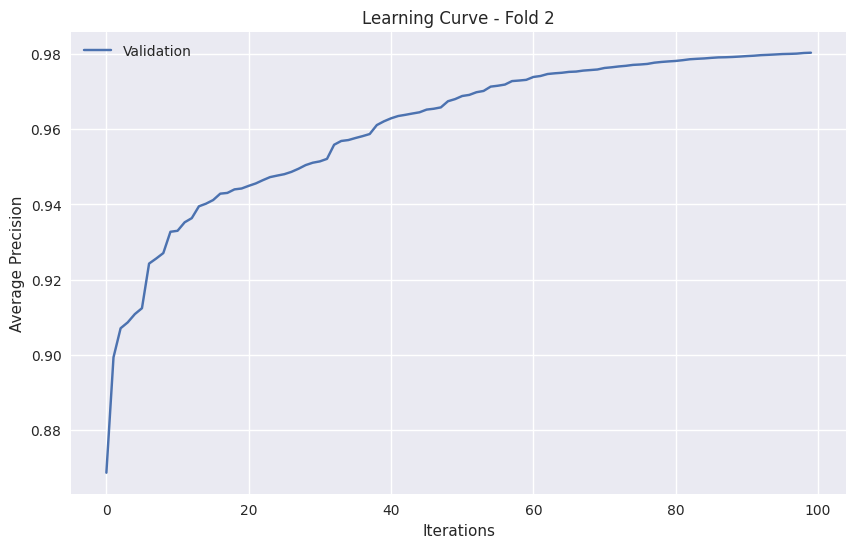

Training fold 3/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.980372
Fold 3 - Train Score: 0.9814, Val Score: 0.9804


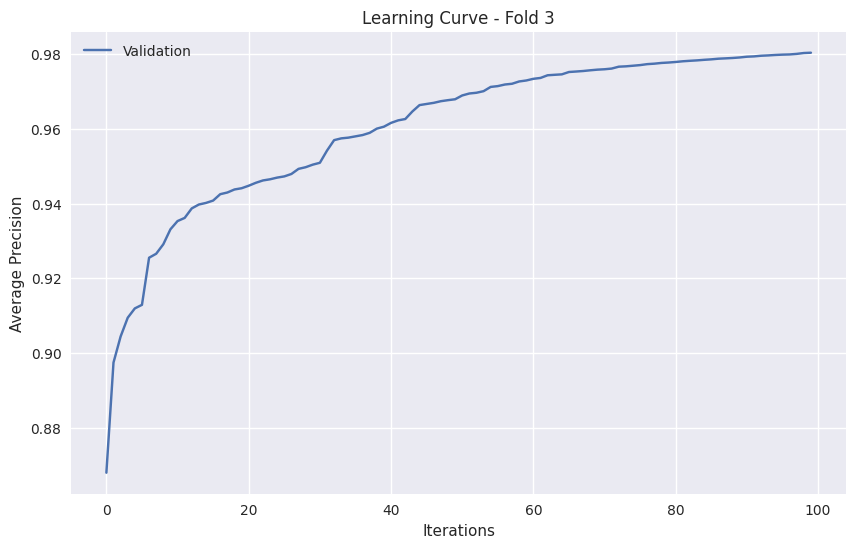

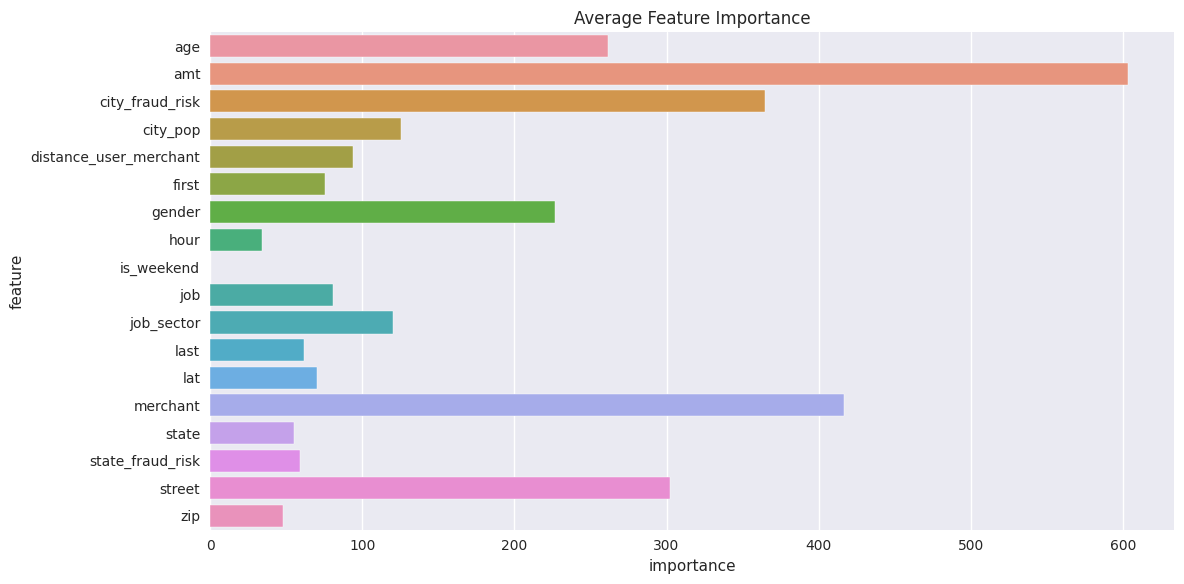

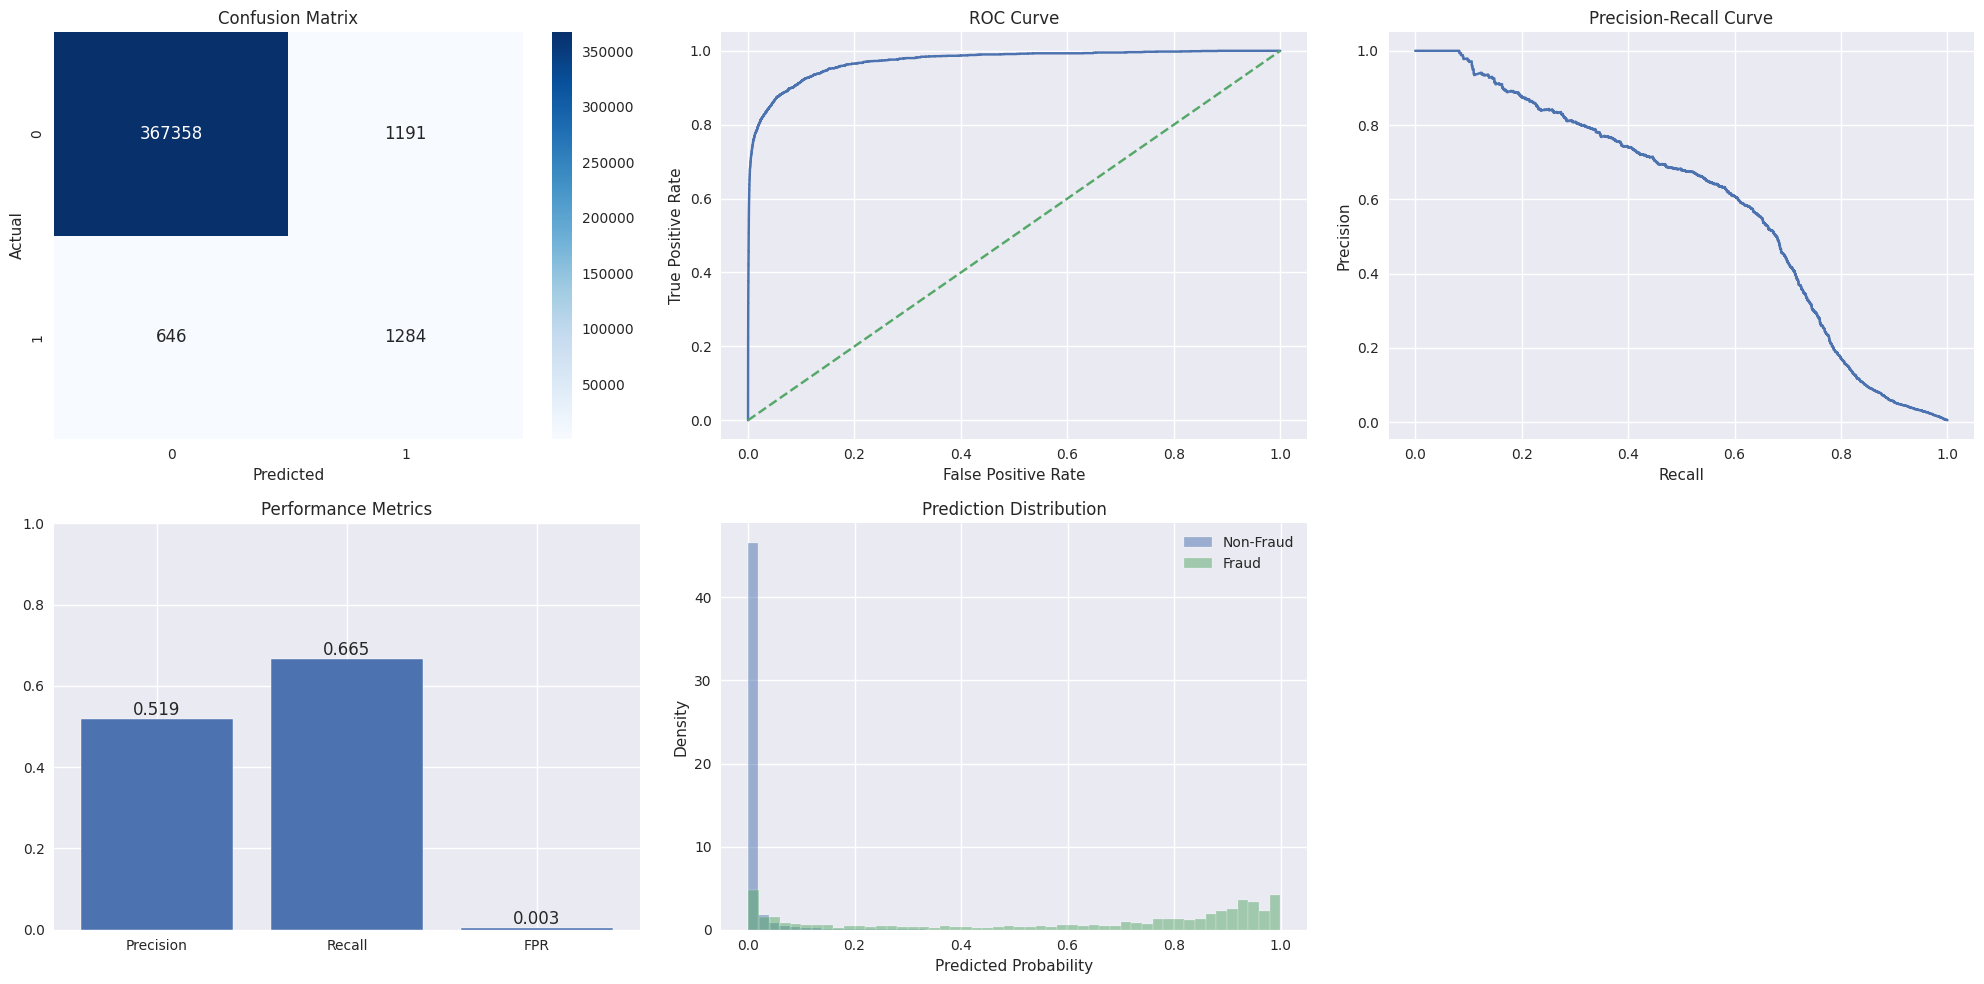


Training completed in 19.97 seconds
Best validation score: 0.9802
Test score: 0.5860


In [110]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (average_precision_score, roc_auc_score, 
                           precision_score, recall_score, confusion_matrix,
                           precision_recall_curve, roc_curve)
import seaborn as sns
from lightgbm.callback import early_stopping

class OptimizedLightGBM:
    def __init__(self, time_budget=3600):
        self.time_budget = time_budget
        self.start_time = None
        self.best_score = 0
        self.best_model = None
        self.cv_results = []
        
    def time_remaining(self):
        elapsed = time.time() - self.start_time
        return self.time_budget - elapsed
    
    def plot_metrics(self, y_true, y_pred, y_pred_proba):
        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        fpr = fp / (fp + tn)
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 10))
        
        # 1. Confusion Matrix
        plt.subplot(231)
        cm_display = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm_display, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        
        # 2. ROC Curve
        plt.subplot(232)
        fpr_curve, tpr_curve, _ = roc_curve(y_true, y_pred_proba)
        plt.plot(fpr_curve, tpr_curve)
        plt.plot([0, 1], [0, 1], '--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        
        # 3. Precision-Recall Curve
        plt.subplot(233)
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
        plt.plot(recall_curve, precision_curve)
        plt.title('Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        
        # 4. Metrics Bar Plot
        plt.subplot(234)
        metrics = {
            'Precision': precision,
            'Recall': recall,
            'FPR': fpr
        }
        plt.bar(metrics.keys(), metrics.values())
        plt.title('Performance Metrics')
        plt.ylim(0, 1)
        for i, v in enumerate(metrics.values()):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
        
        # 5. Prediction Distribution
        plt.subplot(235)
        plt.hist(y_pred_proba[y_true==0], bins=50, alpha=0.5, label='Non-Fraud', density=True)
        plt.hist(y_pred_proba[y_true==1], bins=50, alpha=0.5, label='Fraud', density=True)
        plt.title('Prediction Distribution')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Density')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    def train_evaluate(self, X_train, y_train, X_val, y_val):
        base_params = {
            'objective': 'binary',
            'metric': 'average_precision',
            'verbosity': -1,
            'n_jobs': -1,
            'force_row_wise': True,
            'deterministic': True,
            'feature_pre_filter': True,
            'max_bin': 255,
            'bagging_freq': 5,
            'bagging_fraction': 0.8,
            'feature_fraction': 0.8,
            'min_child_samples': 20,
            'min_child_weight': 0.001,
            'min_split_gain': 0.0,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'device_type': 'cpu'
        }
        
        n_splits = 3
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        train_scores = []
        val_scores = []
        feature_importance_list = []
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            print(f"Training fold {fold+1}/{n_splits}...")
            if self.time_remaining() < 300:
                break
                    
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            model = LGBMClassifier(**base_params)
            model.fit(
                X_fold_train, y_fold_train,
                eval_set=[(X_fold_val, y_fold_val)],
                callbacks=[early_stopping(stopping_rounds=10)],
                eval_metric='average_precision'
            )
            
            train_pred = model.predict_proba(X_fold_train)[:, 1]
            val_pred = model.predict_proba(X_fold_val)[:, 1]
            
            train_score = average_precision_score(y_fold_train, train_pred)
            val_score = average_precision_score(y_fold_val, val_pred)
            
            train_scores.append(train_score)
            val_scores.append(val_score)
            
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            })
            feature_importance_list.append(feature_importance)
            
            print(f"Fold {fold+1} - Train Score: {train_score:.4f}, Val Score: {val_score:.4f}")
            
            # Learning curve plot
            plt.figure(figsize=(10, 6))
            plt.plot(model.evals_result_['valid_0']['average_precision'], label='Validation')
            plt.title(f'Learning Curve - Fold {fold+1}')
            plt.xlabel('Iterations')
            plt.ylabel('Average Precision')
            plt.legend()
            plt.show()
        
        # Feature importance plot
        avg_importance = pd.concat(feature_importance_list).groupby('feature').mean()
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y=avg_importance.index, data=avg_importance.reset_index())
        plt.title('Average Feature Importance')
        plt.tight_layout()
        plt.show()
        
        return np.mean(val_scores), model
    
    def optimize(self, X_train, y_train, X_test, y_test):
        self.start_time = time.time()
        
        print("\nStarting model optimization...")
        print(f"Training data shapes - X: {X_train.shape}, y: {y_train.shape}")
        print(f"Test data shapes - X: {X_test.shape}, y: {y_test.shape}")
        
        best_score, best_model = self.train_evaluate(X_train, y_train, X_test, y_test)
        
        # Get predictions
        test_pred_proba = best_model.predict_proba(X_test)[:, 1]
        test_pred = best_model.predict(X_test)
        test_score = average_precision_score(y_test, test_pred_proba)
        
        # Plot all metrics
        self.plot_metrics(y_test, test_pred, test_pred_proba)
        
        print(f"\nTraining completed in {time.time() - self.start_time:.2f} seconds")
        print(f"Best validation score: {best_score:.4f}")
        print(f"Test score: {test_score:.4f}")
        
        return best_model, test_score

# Load and preprocess data
X_train, y_train, X_test, y_test = load_and_preprocess_data()
    
if X_train is not None:
    optimizer = OptimizedLightGBM(time_budget=3600)
    best_model, test_score = optimizer.optimize(X_train, y_train, X_test, y_test)

Loading data...


Data loaded successfully!
Training set shape: (1621613, 18)
Test set shape: (370479, 18)

Starting model optimization...
Training data shapes - X: (1621613, 18), y: (1621613,)
Test data shapes - X: (370479, 18), y: (370479,)

Training fold 1/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.979775
Fold 1 Scores:
Train Score: 0.9817
Validation Score: 0.9798


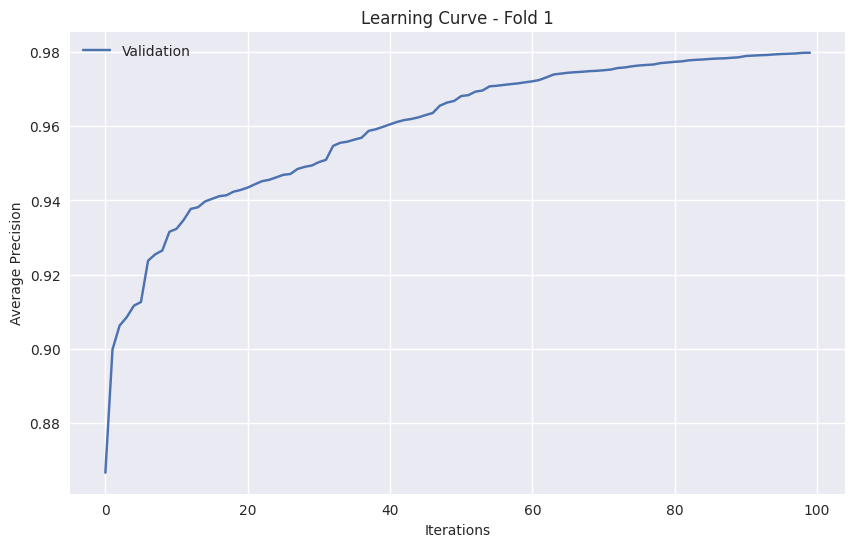


Training fold 2/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.980391
Fold 2 Scores:
Train Score: 0.9814
Validation Score: 0.9804


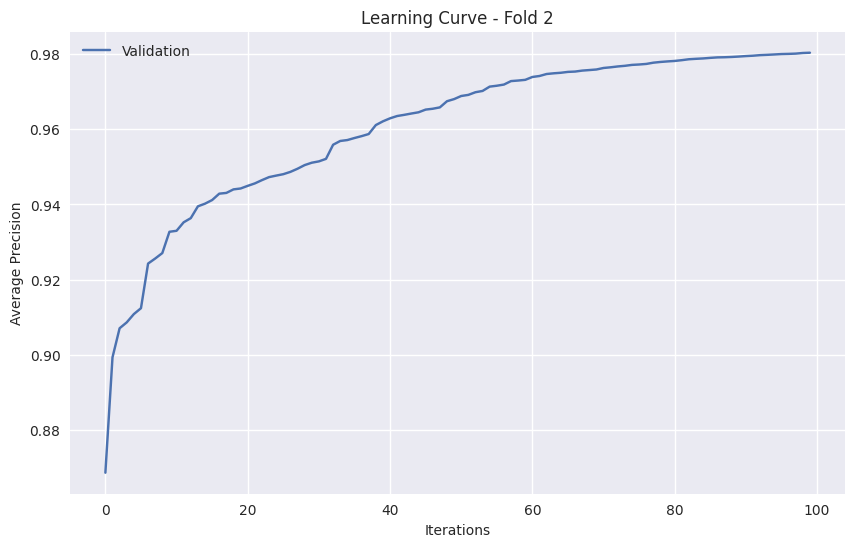


Training fold 3/3...
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.980372
Fold 3 Scores:
Train Score: 0.9814
Validation Score: 0.9804


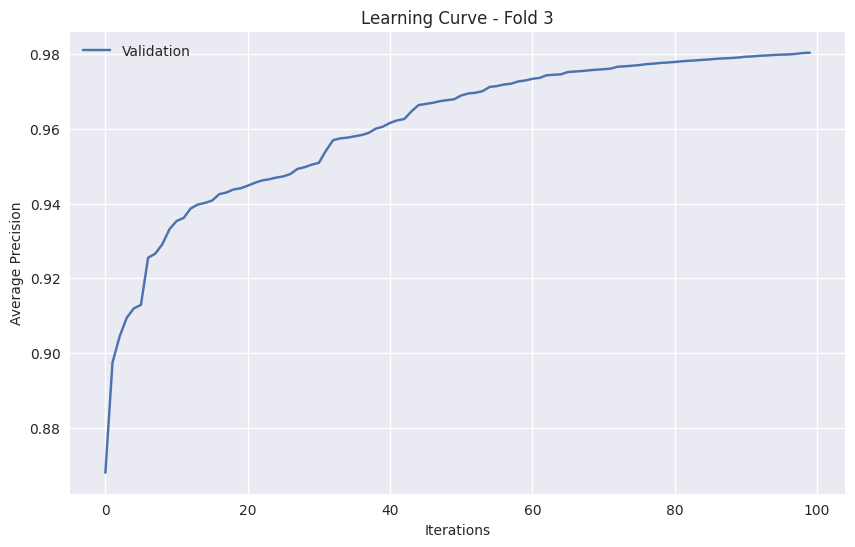

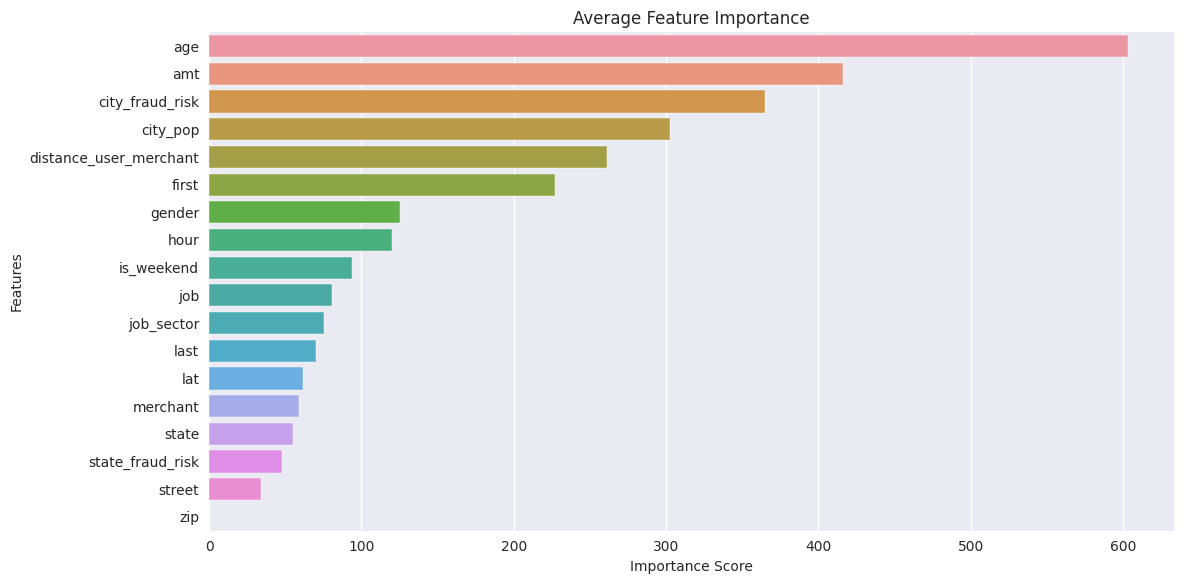

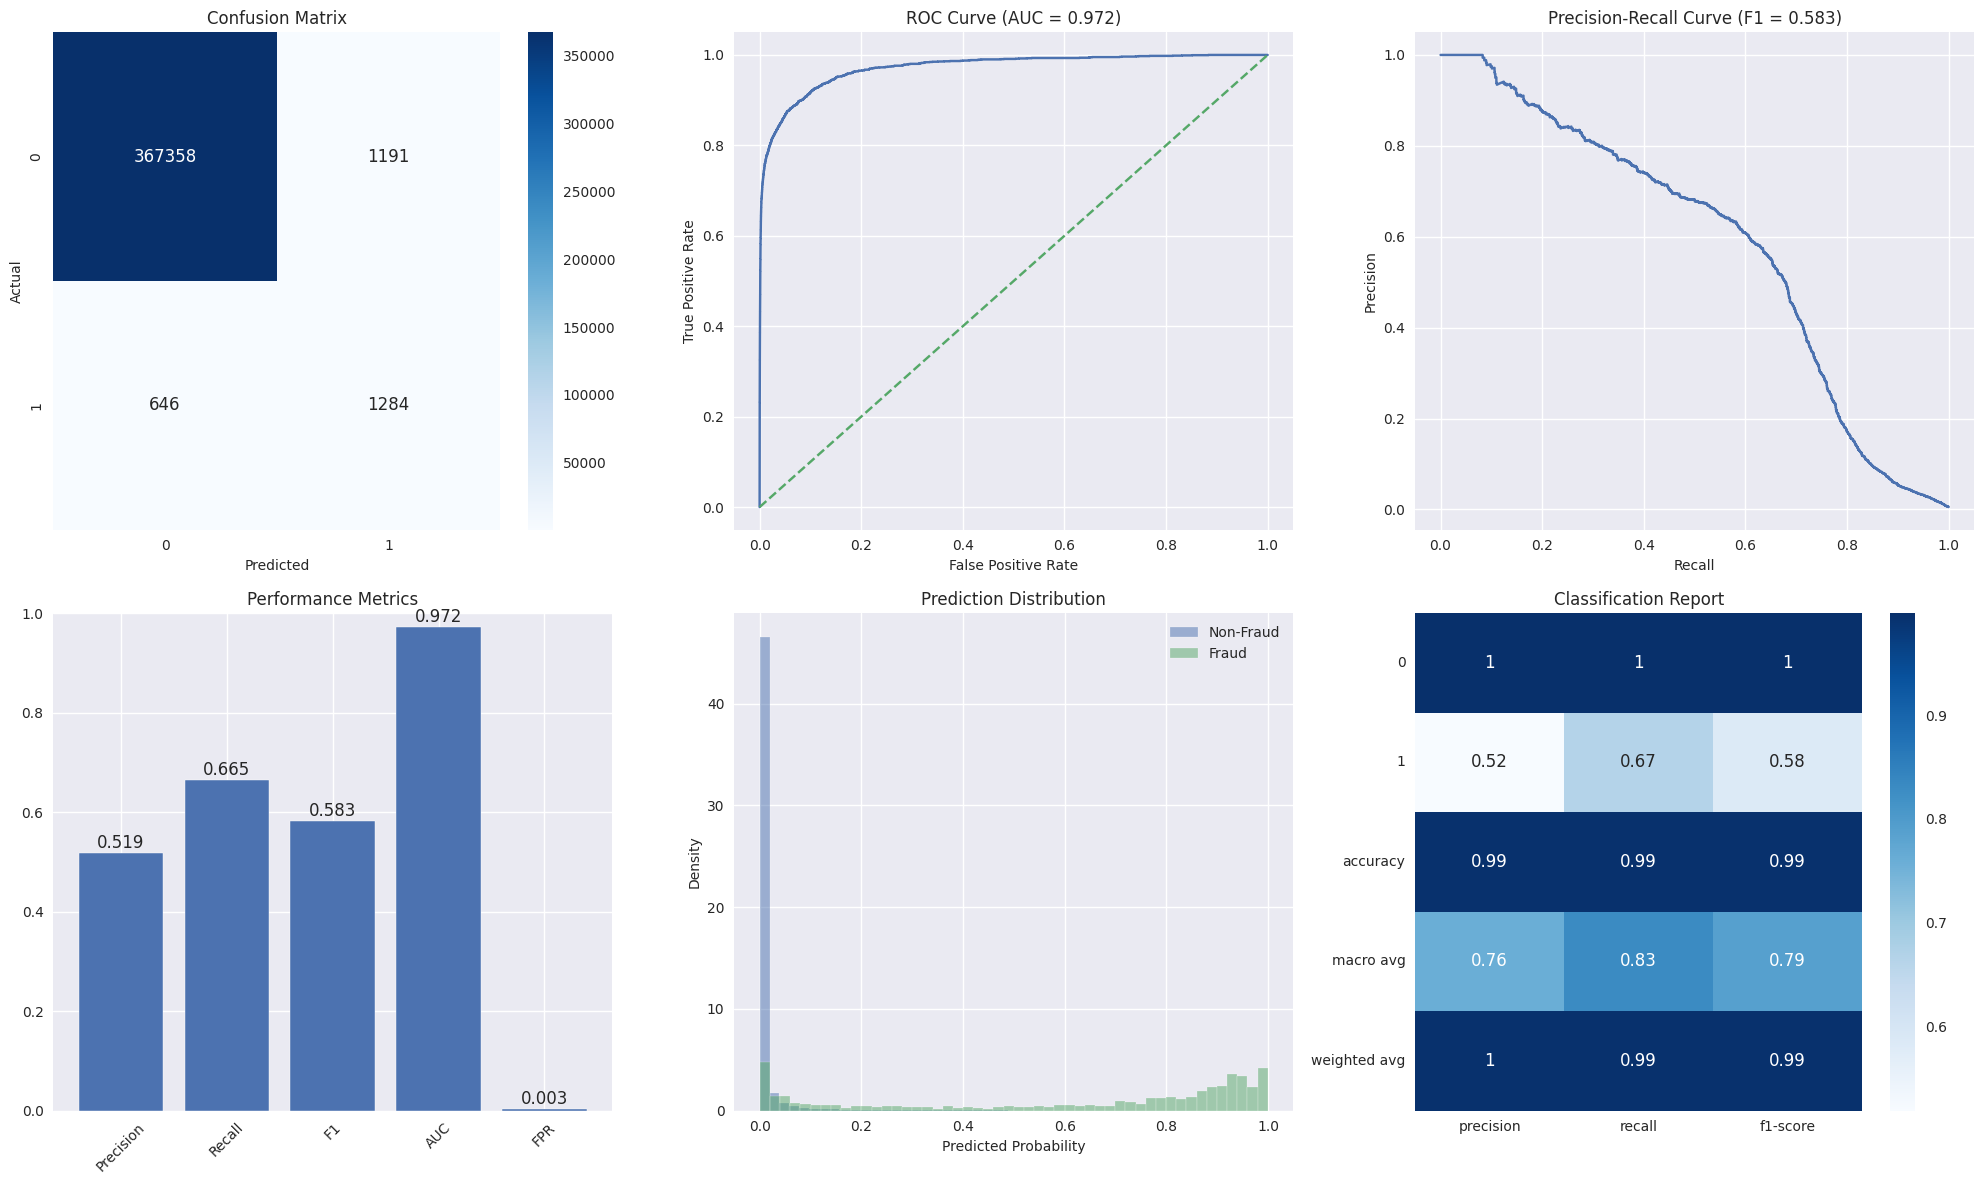


Detailed Performance Metrics:
Precision: 0.519
Recall: 0.665
F1 Score: 0.583
AUC-ROC: 0.972
False Positive Rate: 0.003

Confusion Matrix:
True Negatives: 367358
False Positives: 1191
False Negatives: 646
True Positives: 1284

Training completed in 24.97 seconds
Best validation score: 0.9802
Test score: 0.5860


In [112]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_score, 
    recall_score, f1_score, confusion_matrix, precision_recall_curve, 
    roc_curve, classification_report
)
from lightgbm.callback import early_stopping
import joblib

class OptimizedLightGBM:
    def __init__(self, time_budget=3600):
        self.time_budget = time_budget
        self.start_time = None
        self.best_score = 0
        self.best_model = None
        self.cv_results = []
        
    def time_remaining(self):
        elapsed = time.time() - self.start_time
        return self.time_budget - elapsed
    
    def plot_metrics(self, y_true, y_pred, y_pred_proba):
        """Plot comprehensive metrics visualization"""
        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred_proba)
        fpr = fp / (fp + tn)
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 12))
        
        # 1. Confusion Matrix
        plt.subplot(231)
        cm_display = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm_display, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix', fontsize=12)
        plt.xlabel('Predicted', fontsize=10)
        plt.ylabel('Actual', fontsize=10)
        
        # 2. ROC Curve
        plt.subplot(232)
        fpr_curve, tpr_curve, _ = roc_curve(y_true, y_pred_proba)
        plt.plot(fpr_curve, tpr_curve)
        plt.plot([0, 1], [0, 1], '--')
        plt.title(f'ROC Curve (AUC = {auc:.3f})', fontsize=12)
        plt.xlabel('False Positive Rate', fontsize=10)
        plt.ylabel('True Positive Rate', fontsize=10)
        
        # 3. Precision-Recall Curve
        plt.subplot(233)
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
        plt.plot(recall_curve, precision_curve)
        plt.title(f'Precision-Recall Curve (F1 = {f1:.3f})', fontsize=12)
        plt.xlabel('Recall', fontsize=10)
        plt.ylabel('Precision', fontsize=10)
        
        # 4. Metrics Bar Plot
        plt.subplot(234)
        metrics = {
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'AUC': auc,
            'FPR': fpr
        }
        plt.bar(metrics.keys(), metrics.values())
        plt.title('Performance Metrics', fontsize=12)
        plt.ylim(0, 1)
        for i, v in enumerate(metrics.values()):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
        plt.xticks(rotation=45)
        
        # 5. Prediction Distribution
        plt.subplot(235)
        plt.hist(y_pred_proba[y_true==0], bins=50, alpha=0.5, label='Non-Fraud', density=True)
        plt.hist(y_pred_proba[y_true==1], bins=50, alpha=0.5, label='Fraud', density=True)
        plt.title('Prediction Distribution', fontsize=12)
        plt.xlabel('Predicted Probability', fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.legend()
        
        # 6. Classification Report
        plt.subplot(236)
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        sns.heatmap(pd.DataFrame(report_df[['precision', 'recall', 'f1-score']]).round(3),
                   annot=True, cmap='Blues')
        plt.title('Classification Report', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed metrics
        print("\nDetailed Performance Metrics:")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")
        print(f"AUC-ROC: {auc:.3f}")
        print(f"False Positive Rate: {fpr:.3f}")
        print(f"\nConfusion Matrix:")
        print(f"True Negatives: {tn}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"True Positives: {tp}")
    
    def train_evaluate(self, X_train, y_train, X_val, y_val):
        """Train and evaluate model with cross-validation"""
        base_params = {
            'objective': 'binary',
            'metric': 'average_precision',
            'verbosity': -1,
            'n_jobs': -1,
            'force_row_wise': True,
            'deterministic': True,
            'feature_pre_filter': True,
            'max_bin': 255,
            'bagging_freq': 5,
            'bagging_fraction': 0.8,
            'feature_fraction': 0.8,
            'min_child_samples': 20,
            'min_child_weight': 0.001,
            'min_split_gain': 0.0,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'device_type': 'cpu'
        }
        
        n_splits = 3
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        train_scores = []
        val_scores = []
        feature_importance_list = []
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            print(f"\nTraining fold {fold+1}/{n_splits}...")
            
            if self.time_remaining() < 300:  # Stop if less than 5 minutes remaining
                break
                    
            X_fold_train = X_train.iloc[train_idx]
            X_fold_val = X_train.iloc[val_idx]
            y_fold_train = y_train.iloc[train_idx]
            y_fold_val = y_train.iloc[val_idx]
            
            model = LGBMClassifier(**base_params)
            model.fit(
                X_fold_train, y_fold_train,
                eval_set=[(X_fold_val, y_fold_val)],
                callbacks=[early_stopping(stopping_rounds=10)],
                eval_metric='average_precision'
            )
            
            # Evaluate
            train_pred = model.predict_proba(X_fold_train)[:, 1]
            val_pred = model.predict_proba(X_fold_val)[:, 1]
            
            train_score = average_precision_score(y_fold_train, train_pred)
            val_score = average_precision_score(y_fold_val, val_pred)
            
            train_scores.append(train_score)
            val_scores.append(val_score)
            
            # Record feature importance
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            })
            feature_importance_list.append(feature_importance)
            
            print(f"Fold {fold+1} Scores:")
            print(f"Train Score: {train_score:.4f}")
            print(f"Validation Score: {val_score:.4f}")
            
            # Plot learning curve
            plt.figure(figsize=(10, 6))
            plt.plot(model.evals_result_['valid_0']['average_precision'], label='Validation')
            plt.title(f'Learning Curve - Fold {fold+1}', fontsize=12)
            plt.xlabel('Iterations', fontsize=10)
            plt.ylabel('Average Precision', fontsize=10)
            plt.legend()
            plt.show()
        
        # Plot average feature importance
        avg_importance = pd.concat(feature_importance_list).groupby('feature').mean()
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y=avg_importance.index, 
                   data=avg_importance.reset_index().sort_values('importance', ascending=False))
        plt.title('Average Feature Importance', fontsize=12)
        plt.xlabel('Importance Score', fontsize=10)
        plt.ylabel('Features', fontsize=10)
        plt.tight_layout()
        plt.show()
        
        return np.mean(val_scores), model
    
    def optimize(self, X_train, y_train, X_test, y_test):
        """Optimize model and evaluate on test set"""
        self.start_time = time.time()
        
        print("\nStarting model optimization...")
        print(f"Training data shapes - X: {X_train.shape}, y: {y_train.shape}")
        print(f"Test data shapes - X: {X_test.shape}, y: {y_test.shape}")
        
        best_score, best_model = self.train_evaluate(X_train, y_train, X_test, y_test)
        
        # Evaluate on test set
        test_pred_proba = best_model.predict_proba(X_test)[:, 1]
        test_pred = best_model.predict(X_test)
        test_score = average_precision_score(y_test, test_pred_proba)
        
        # Plot comprehensive metrics
        self.plot_metrics(y_test, test_pred, test_pred_proba)
        
        print(f"\nTraining completed in {time.time() - self.start_time:.2f} seconds")
        print(f"Best validation score: {best_score:.4f}")
        print(f"Test score: {test_score:.4f}")
        
        return best_model, test_score

def load_and_preprocess_data():
    """Load and preprocess the data"""
    try:
        print("Loading data...")
        X_train = pd.read_csv('data/processed_X_train_v2.csv')
        y_train = pd.read_csv('data/processed_y_train_v2.csv')['is_fraud']
        X_test = pd.read_csv('data/processed_X_test_v2.csv')
        y_test = pd.read_csv('data/processed_y_test_v2.csv')['is_fraud']
        
        # Remove trans_num if exists
        if 'trans_num' in X_train.columns:
            X_train = X_train.drop('trans_num', axis=1)
        if 'trans_num' in X_test.columns:
            X_test = X_test.drop('trans_num', axis=1)
        
        print("Data loaded successfully!")
        print(f"Training set shape: {X_train.shape}")
        print(f"Test set shape: {X_test.shape}")
        
        return X_train, y_train, X_test, y_test
    except Exception as e:
        print(f"Error in data preprocessing: {e}")
        return None, None, None, None

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    
    if X_train is not None:
        # Initialize and run optimization
        optimizer = OptimizedLightGBM(time_budget=3600)  # 1 hour time budget
        best_model, test_score = optimizer.optimize(X_train, y_train, X_test, y_test)

Using model from: results_20241202_015643/best_model.joblib


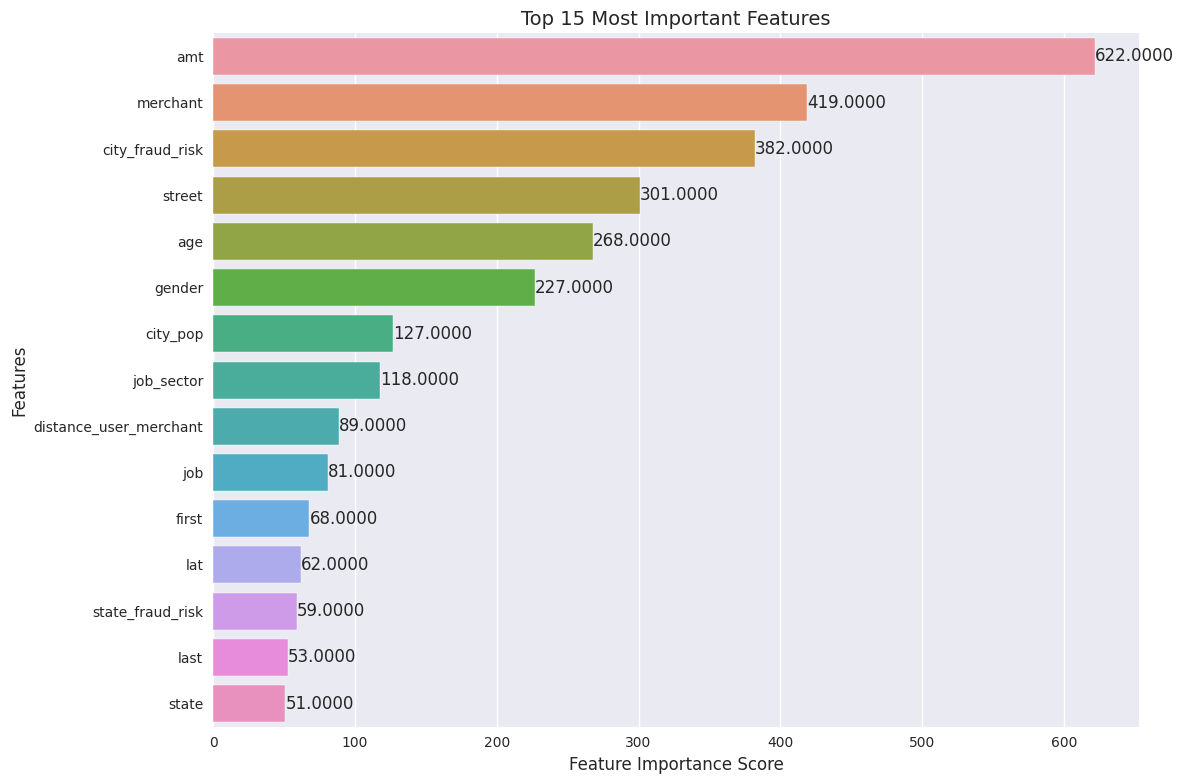


Feature Importance Rankings:
               feature  importance
                   amt         622
              merchant         419
       city_fraud_risk         382
                street         301
                   age         268
                gender         227
              city_pop         127
            job_sector         118
distance_user_merchant          89
                   job          81
                 first          68
                   lat          62
      state_fraud_risk          59
                  last          53
                 state          51
                   zip          37
                  hour          36
            is_weekend           0


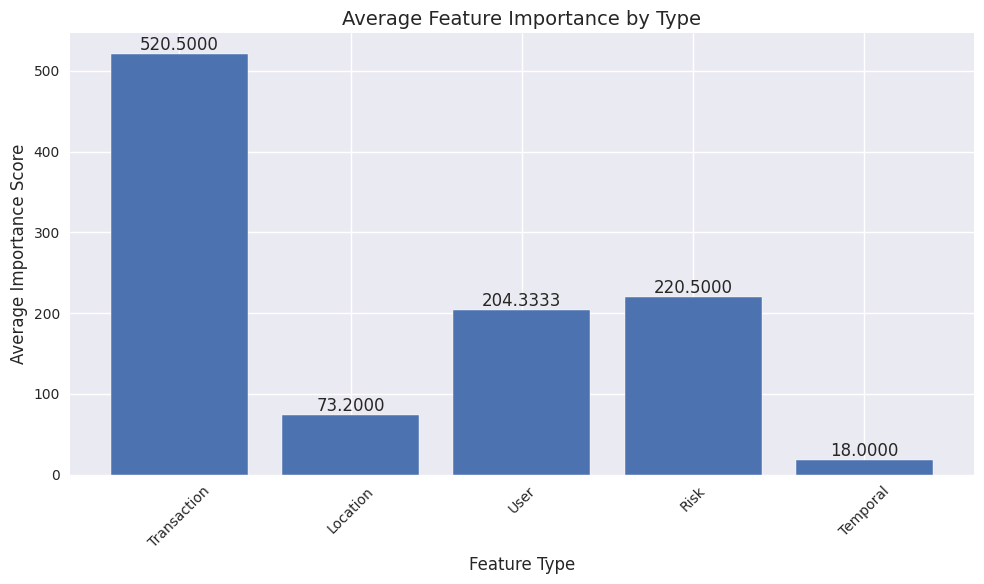


Key Insights from Feature Importance Analysis:
1. Most Important Features:
   - amt: 622.0000
   - merchant: 419.0000
   - city_fraud_risk: 382.0000
   - street: 301.0000
   - age: 268.0000

2. Feature Type Importance Ranking:
   - Transaction: 520.5000
   - Risk: 220.5000
   - User: 204.3333
   - Location: 73.2000
   - Temporal: 18.0000


In [87]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler

def analyze_feature_importance(model_path, X_test):
    """
    Analyze and visualize feature importance from the trained model
    """
    try:
        # Load the model
        model = joblib.load(model_path)
        
        # Get feature importance scores
        importance_scores = model.feature_importances_
        
        # Create DataFrame with feature names and importance scores
        feature_importance = pd.DataFrame({
            'feature': X_test.columns,
            'importance': importance_scores
        })
        
        # Sort by importance
        feature_importance = feature_importance.sort_values('importance', ascending=False)
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        
        # Create bar plot
        sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
        
        plt.title('Top 15 Most Important Features', fontsize=14)
        plt.xlabel('Feature Importance Score', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        
        # Add value labels on bars
        for i, v in enumerate(feature_importance['importance'].head(15)):
            plt.text(v, i, f'{v:.4f}', va='center')
        
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        plt.show()
        
        # Print detailed feature importance table
        print("\nFeature Importance Rankings:")
        print(feature_importance.to_string(index=False))
        
        # Group features by type and analyze average importance
        feature_types = {
            'Transaction': ['amt', 'category', 'merchant'],
            'Location': ['city', 'state', 'zip', 'lat', 'long', 'city_pop', 'distance_user_merchant'],
            'User': ['gender', 'age', 'job_sector'],
            'Risk': ['city_fraud_risk', 'state_fraud_risk'],
            'Temporal': ['hour', 'day_of_week', 'month', 'is_weekend']
        }
        
        type_importance = {}
        for ftype, features in feature_types.items():
            # Get features that exist in the dataset
            existing_features = [f for f in features if f in feature_importance['feature'].values]
            if existing_features:
                avg_importance = feature_importance[
                    feature_importance['feature'].isin(existing_features)
                ]['importance'].mean()
                type_importance[ftype] = avg_importance
        
        # Plot feature type importance
        plt.figure(figsize=(10, 6))
        plt.bar(type_importance.keys(), type_importance.values())
        plt.title('Average Feature Importance by Type', fontsize=14)
        plt.xlabel('Feature Type', fontsize=12)
        plt.ylabel('Average Importance Score', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add value labels
        for i, v in enumerate(type_importance.values()):
            plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('feature_type_importance.png')
        plt.show()
        
        # Print insights
        print("\nKey Insights from Feature Importance Analysis:")
        print("1. Most Important Features:")
        for _, row in feature_importance.head(5).iterrows():
            print(f"   - {row['feature']}: {row['importance']:.4f}")
            
        print("\n2. Feature Type Importance Ranking:")
        for ftype, importance in sorted(type_importance.items(), key=lambda x: x[1], reverse=True):
            print(f"   - {ftype}: {importance:.4f}")
            
        return feature_importance, type_importance
        
    except Exception as e:
        print(f"Error in feature importance analysis: {e}")
        return None, None

# Load test data and run analysis
try:
    # Load test data
    X_test = pd.read_csv('data/processed_X_test_v2.csv')
    if 'trans_num' in X_test.columns:
        X_test = X_test.drop('trans_num', axis=1)
    
    # Find most recent results directory
    import glob
    import os
    
    results_dirs = glob.glob('results_*')
    if results_dirs:
        latest_dir = max(results_dirs, key=os.path.getctime)
        model_path = f'{latest_dir}/best_model.joblib'
        print(f"Using model from: {model_path}")
        
        # Run feature importance analysis
        feature_importance, type_importance = analyze_feature_importance(model_path, X_test)
        
    else:
        print("No results directory found!")
        
except Exception as e:
    print(f"Error in main execution: {e}")